# Fixed Income Derivatives - The Hull-White Extended Vasicek Model
In this problem, we will consider the Hull-White Extended Vasicek Model model, in which the short rate
$r_t$ is assumed to have the following dynamics under the risk-neutral measure $\mathbb{Q}$:
$$dr_t = (\Theta_t - ar_t) dt + \sigma dW_t$$
where $a$, $\Theta_t$, and $\sigma$ are model parameters.

In the coming problems, we will fit a HWEV model to observed market data and compute prices of caplets, a cap and a swaption. We will use the same data as in the Ho-Lee model example and the code used to produce the results will be very close to that of the Ho-Lee model example

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import numpy as np
from scipy.optimize import minimize

# add the directory
import sys
import os
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

## Problem 1 - Zero coupon bond prices in the Hull-White Extended Vasicek model
Let us recall that the Hull-White Extended Vasicek model possesses an affine term structure and that zero coupon bond prices
are of the form:
$$
\begin{split}
P(t, T) &= e^{A(t,T) - B(t,T)r_t} \\
A(t,T) &= \int_t^T \left(\frac{1}{2} \sigma^2 B(s,T)^2 - \Theta(s)B(s,T)\right) ds \\
B(t,T) &= \frac{1}{a}\left[1 - e^{-a(T-t)}\right]
\end{split}
$$
Just as was the case with the Ho-Lee model, the HWEV model can by construction be fitted to the initial term structure and in particular, must be fitted to the observed term structure of forward rates $f^*(0,T)$ and their derivatives $f^*(0,T)$.

***See ChatGPT for proposed solution***

#### (a) Show that the solution to the SDE in $dr_t = (\theta_t - ar_t) dt + \sigma dW_t$ can be written as $$r_T = e^{-a(T-t)}r_t + \int_t^T e^{-a(T-s)}\Theta(s) ds + \sigma\int_t^T e^{-a(T-s)} dW_s$$ and use the explicit solution to find the distribution of $t_T \mid \mathcal{F}_t$.

#### (b) Find an expression for forward rates in the HWEV model and use this this expression to show that fitting the model to observed market data involves setting $$\Theta(t) = f^*_T(0,t) + g(t) + a\left[f^*(0,t)+g(t)\right]$$ where $f^*_T (0,t)$ is the derivative of $f^*$ with respect to the second argument (the maturity $T$) evaluated at the point $(0,t)$ and where $$g(t) = \frac{\sigma^2}{2a^2}\left(1-e^{-at}\right)^2$$

#### (c) Use the expression you have found for $\Theta(t)$ along with $$\begin{split} P(t, T) &= e^{A(t,T) - B(t,T)r_t} \\ A(t,T) &= \int_t^T \left(\frac{1}{2} \sigma^2 B(s,T)^2 - \Theta(s)B(s,T)\right) ds \\ B(t,T) &= \frac{1}{a}\left[1 - e^{-a(T-t)}\right] \end{split} $$ to show that given an initial fit at time 0, ZCB prices at time $t$ are given by $$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{B(t,T)f^*(0,t)-\frac{\sigma^2}{4a}B^2(t,T)\left(1-e^{-2at}\right)-B(t,T)r_t\right\}$$

#### (d) Use the expression for ZCB prices in $$\begin{split} P(t, T) &= e^{A(t,T) - B(t,T)r_t} \\ A(t,T) &= \int_t^T \left(\frac{1}{2} \sigma^2 B(s,T)^2 - \Theta(s)B(s,T)\right) ds \\ B(t,T) &= \frac{1}{a}\left[1 - e^{-a(T-t)}\right] \end{split} $$ to show that the dynamics of ZCB prices in the HWEV model are $$dP(t,T) = \alpha(t,T)P(t,T)dt + \beta(t,T)P(t,T)dW_t$$ and determine $\alpha(t,T)$ and $\beta(t,T)$.

#### (e) For $u$ such that $t<u<T$ find a solution to the SDE $dP(t,T) = \alpha(t,T)P(t,T)dt + \beta(t,T)P(t,T)dW_t$

#### (d) Show that $\ln{P(u,T)\mid \mathcal{F}t}$ follows a log-normal distribution and find the mean and variance of $\ln P(u,T)$.

## Problem 2 - Option prices in the Hull-White model
Next, we will consider a European call option with time $t$ price denoted $\Pi(t; T_1,T_2)$, strike $K$ and exercise
at $T_1$ on a maturity $T_2$ zero coupon bond with $t < T_1 < T_2$. Just as in the Ho-Lee model, the easiest way to derive a formula for the price of a European call option on $p(t,T_2)$ is to use a more general result on option pricing.

***See ChatGPT for proposed solution***

#### (a) Show that the dynamics of forward rates are of the form $$df(t,T) = - \frac{\partial}{\partial T}\left[A_t(t,T)dt - B_t(t,T)r_t dt - B(t,T)dr_t\right] = \alpha(t,T)dt + \sigma e^{-a(T-t)}dW_t$$ and determine $\alpha(t,T). Note that $\alpha(t,T) is not the same as the previously derived $\alpha$. The point is however that the exact form of $\alpha(t,T)$ will not matter for option prices.

#### (b) Find the distribution of forward rates and argue that they are Gaussian

#### (c) Finally use a result we have derived for European call option prices when forward rates follow a Gaussian distribution to show that $$\Pi(t;T_1,T_2) = p(t,T_2)\Phi(d_1) - Kp(t,T_1)\Phi(d_2)$$ where $$d_1 = \frac{\ln\left(\frac{p(t,T_2)}{Kp(t,T_1)}\right) +\frac{1}{2}\Sigma^2}{\sqrt{\Sigma^2}}, \qquad d_2 = \frac{\ln\left(\frac{p(t,T_2)}{Kp(t,T_1)}\right) -\frac{1}{2}\Sigma^2}{\sqrt{\Sigma^2}}$$ and $$\Sigma^2 = \frac{\sigma^2}{2a^3}\left[1-e^{-2a(T_1-t)}\right]\left[1-e^{-2a(T_2-T_1)}\right]^2$$

## Problem 3 - Fitting the yield curve and the Vasicek model to data
Assume you have the following market data available and that the interest rate swaps pay 6M EURIBOR semiannually against a fixed rate paid annually
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\textbf{EURIBOR} & \textbf{Fixing} & \textbf{FRA} & \textbf{Midquote (FRA)} & \textbf{IRS} & \textbf{Midquote (IRS)} \\ \hline
6M & 0.0430136 & 1X7 & 0.0455066 & 2Y & 0.0558702 \\ 
 &  & 2X8 & 0.0477436 & 3Y & 0.058811 \\ 
 &  & 3X9 & 0.0497492 & 4Y & 0.0600937 \\ 
 &  & 4X10 & 0.0515456 & 5Y & 0.0605263 \\ 
 &  & 5X11 & 0.0531529 & 7Y & 0.0601899 \\ 
 &  & 6X12 & 0.0545893 & 10Y & 0.0588669 \\ 
 &  & 7X13 & 0.0558712 & 15Y & 0.0562267 \\ 
 &  & 8X14 & 0.0570135 & 20Y & 0.0547351 \\ 
 &  & 9X15 & 0.0580298 & 30Y & 0.0535523 \\ \hline
\end{array}
$$

In [2]:
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.0430136}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.0455066},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.0477436},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.0497492},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.0515456},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.0531529},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.0545893},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.0558712},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.0570135},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.0580298}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.0558702, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.058811, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.0600937, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.0605263, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.0601899, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.0586669, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.0562267, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.0547351, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.0535523, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market

#### (a) Fit a ZCB spot rate curve to the market data and plot spot and forward rates from your choice of interpolation method. Also discuss if the spot and forward rates from your fit have the properties that we would like fitted spot- and forward rates to have

In [3]:
resolution = 12 # points per year (the fid.interpolate fundtion later requires overlap of T_fit and T_inter. As we have FRA data monthly 15 months ahead, we must have monthly data for this as a minimum)
interpolation_options = {"method":"nelson_siegel","transition": 'smooth'}
T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options =interpolation_options)
T_res = np.array([i*(1/resolution) for i in range(0,int(T_fit[-1])*resolution + 1)])

p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter=T_res,T=T_fit,R=R_fit,interpolation_options = interpolation_options)

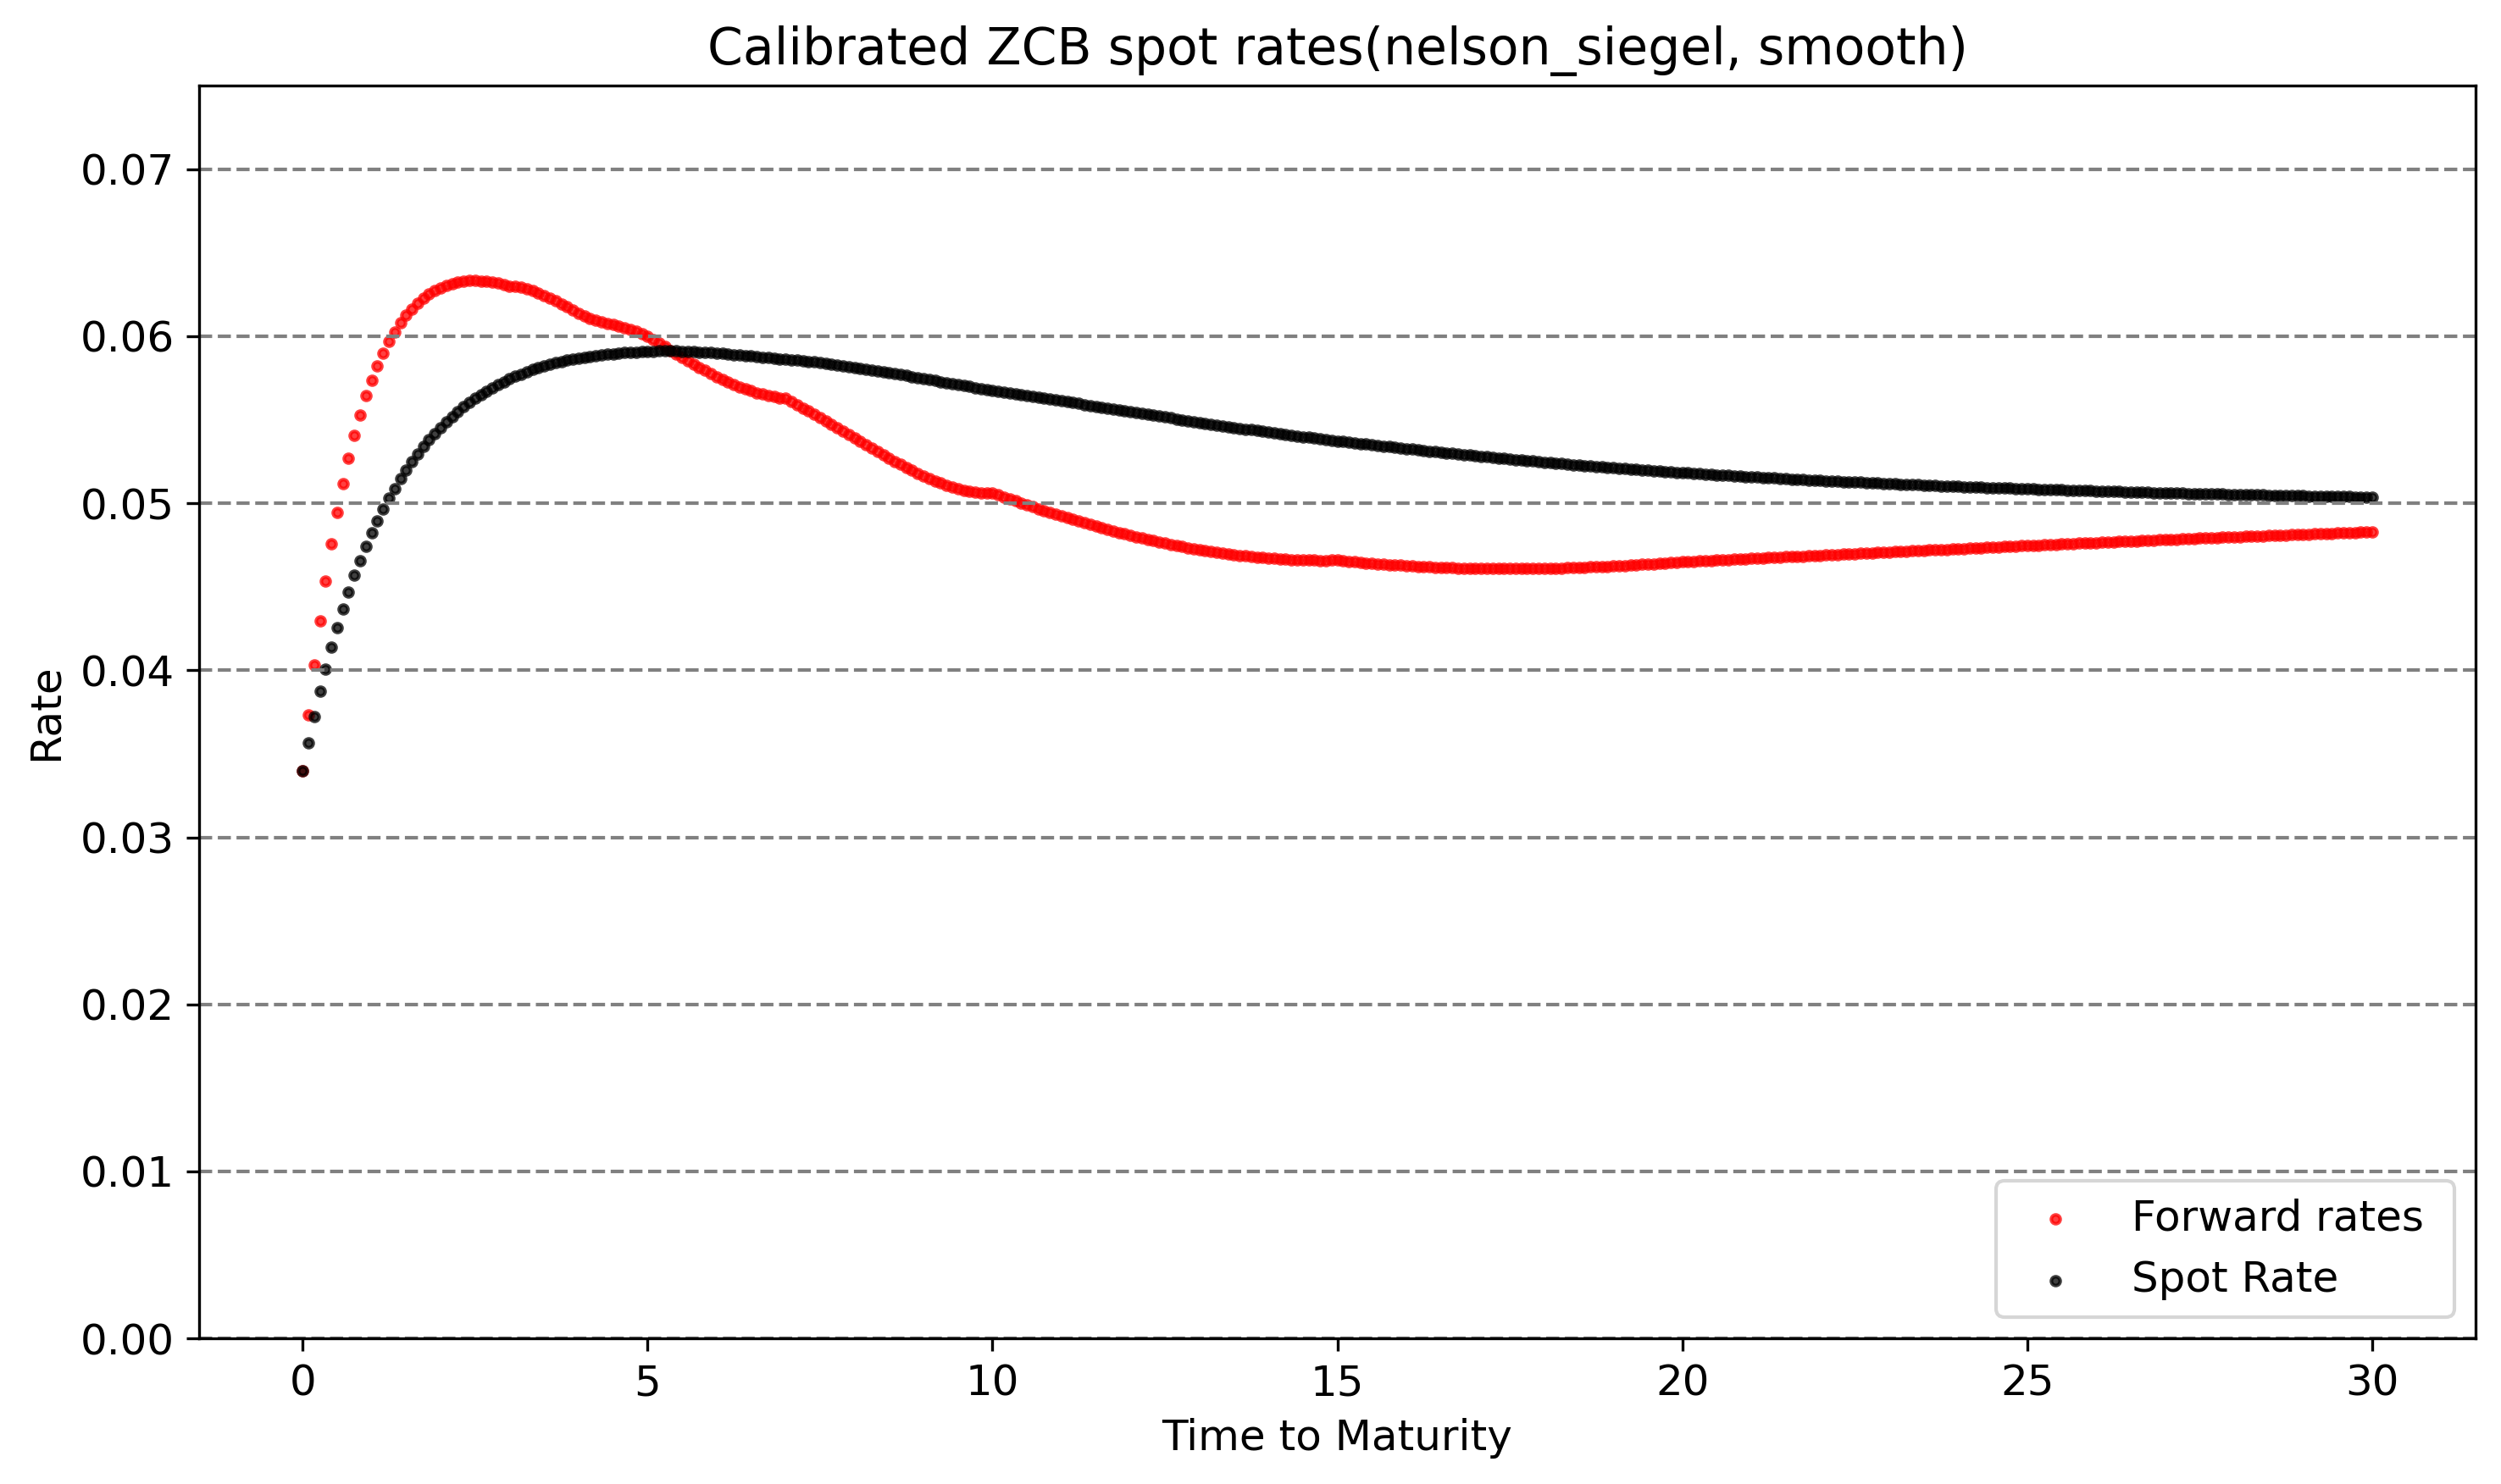

In [4]:
fit = [{'label':'Forward rates', 'x':T_inter, 'y':f_inter, 's':25,'color':'red'},
       {'label':'Spot Rate', 'x':T_inter, 'y':R_inter,'color':'black','s':25}]

plot.rates(fit,title=f'Calibrated ZCB spot rates({interpolation_options["method"]}, {interpolation_options["transition"]})')

We want the spot and forward rates to be smooth as we are using its deriatives when choosing $\Theta$ Vasicek will likely fit bad to the data as we have a hump-shaped curve, which it cannot handle. It can only handle a monotonically increasing or decreasing curve (or flat); hence, we expect a bad fit in the next question.

#### (b) Using the initial values $r_0 = 0.035$, $a = 0.5$, $b = 0.025$, $\sigma = 0.03$, fit a Vasicek model to the ZCB spot rates you have calibrated from market data and plot the fitted spot- and forward rates from your Vasicek model in a plot that also contains the spot and forward rates you found in (a).

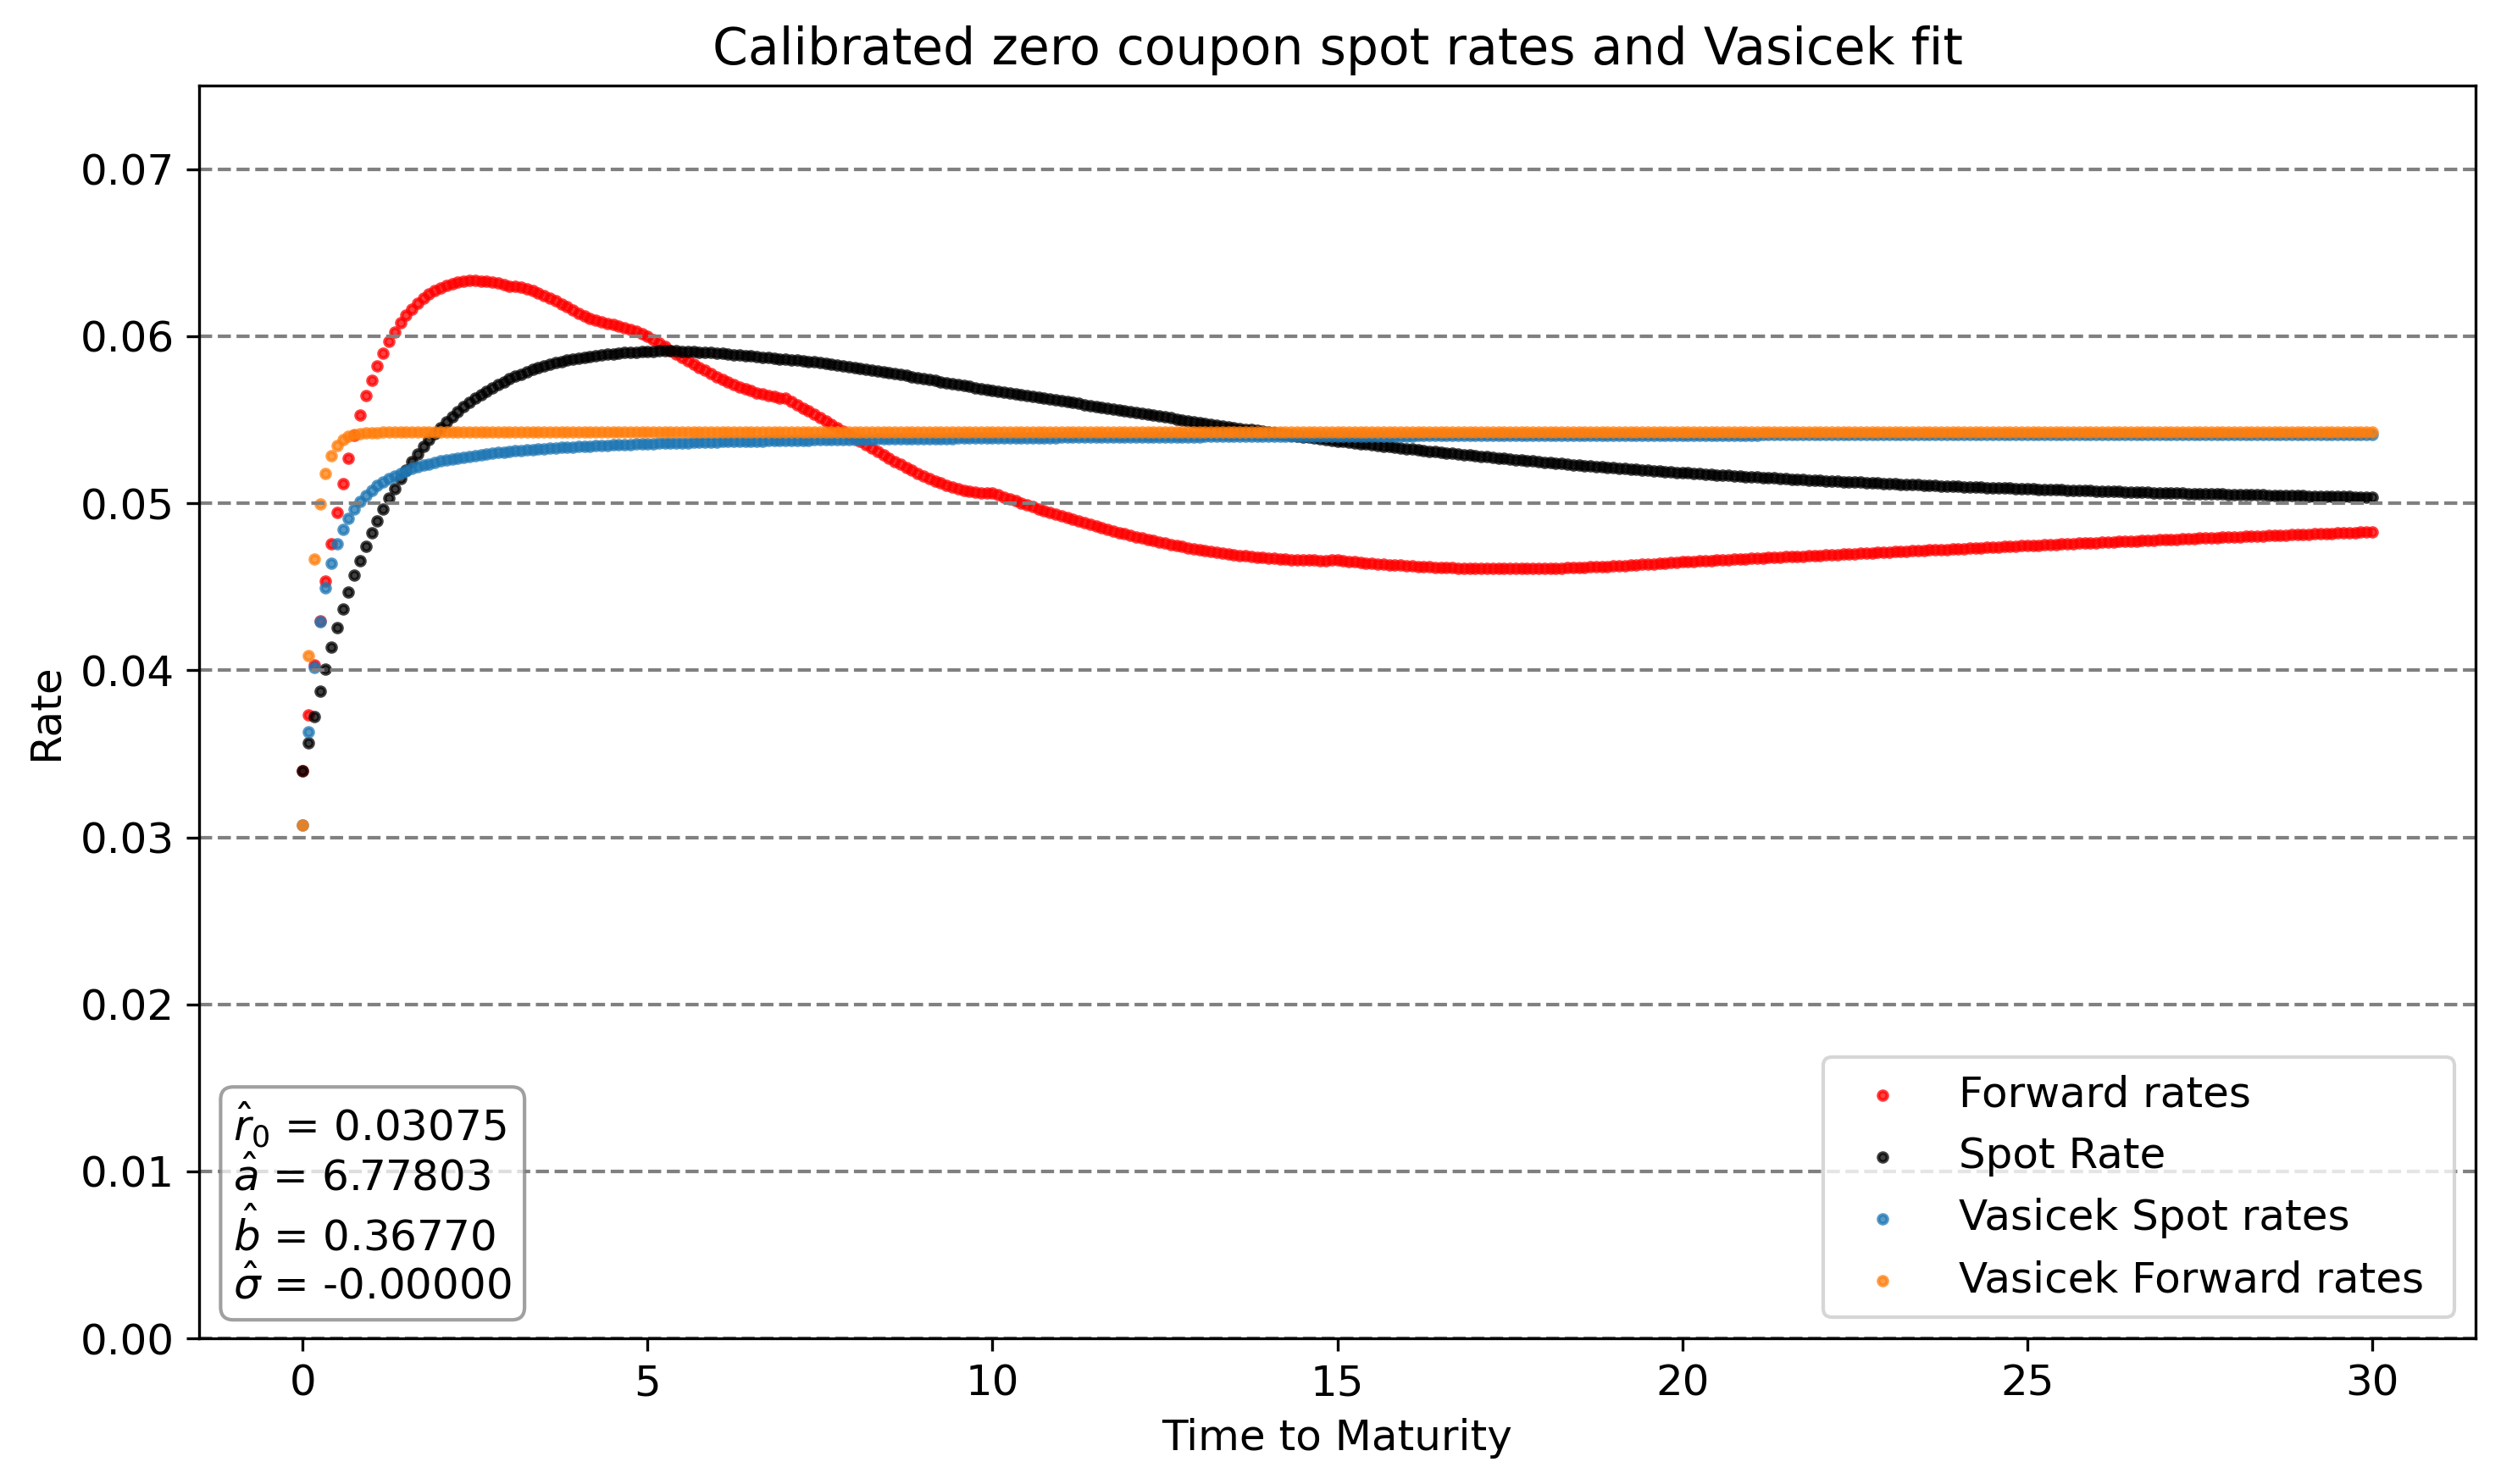

In [5]:
r0, a, b, sigma = 0.035, 0.5, 0.025, 0.03
param0 = r0, a, b, sigma
result = minimize(fid.fit_vasicek_obj,param0,method='nelder-mead',args=(R_inter,T_inter),options={'xatol': 1e-20,'disp': True})
r0_vasicek, a_vasicek, b_vasicek, sigma_vasicek = result.x
p_vasicek = fid.zcb_price_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)
f_vasicek = fid.forward_rate_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)
R_vasicek = fid.spot_rate_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)
fit_vasicek = fit.copy()
fit_vasicek.append({'label':'Vasicek Spot rates', 'x':T_inter, 'y':R_vasicek,'s':25})
fit_vasicek.append({'label':'Vasicek Forward rates', 'x':T_inter, 'y':f_vasicek,'s':25})
text = {'$\hat{r}_0$':r0_vasicek,'$\hat{a}$':a_vasicek,'$\hat{b}$':b_vasicek,'$\hat{\sigma}$':sigma_vasicek}

plot.rates(fit_vasicek,title='Calibrated zero coupon spot rates and Vasicek fit',text=text)

#### (c) Using the initial values $r_0 = 0.035$, $a = 0.5$, $b = 0.05$, $\sigma = 0.1$, fit a CIR model to the ZCB spot rates you have calibrated from market data and plot the fitted spot- and forward rates from your CIR model in a plot t_vasicek also contains the spot and forward rates you found in (a).

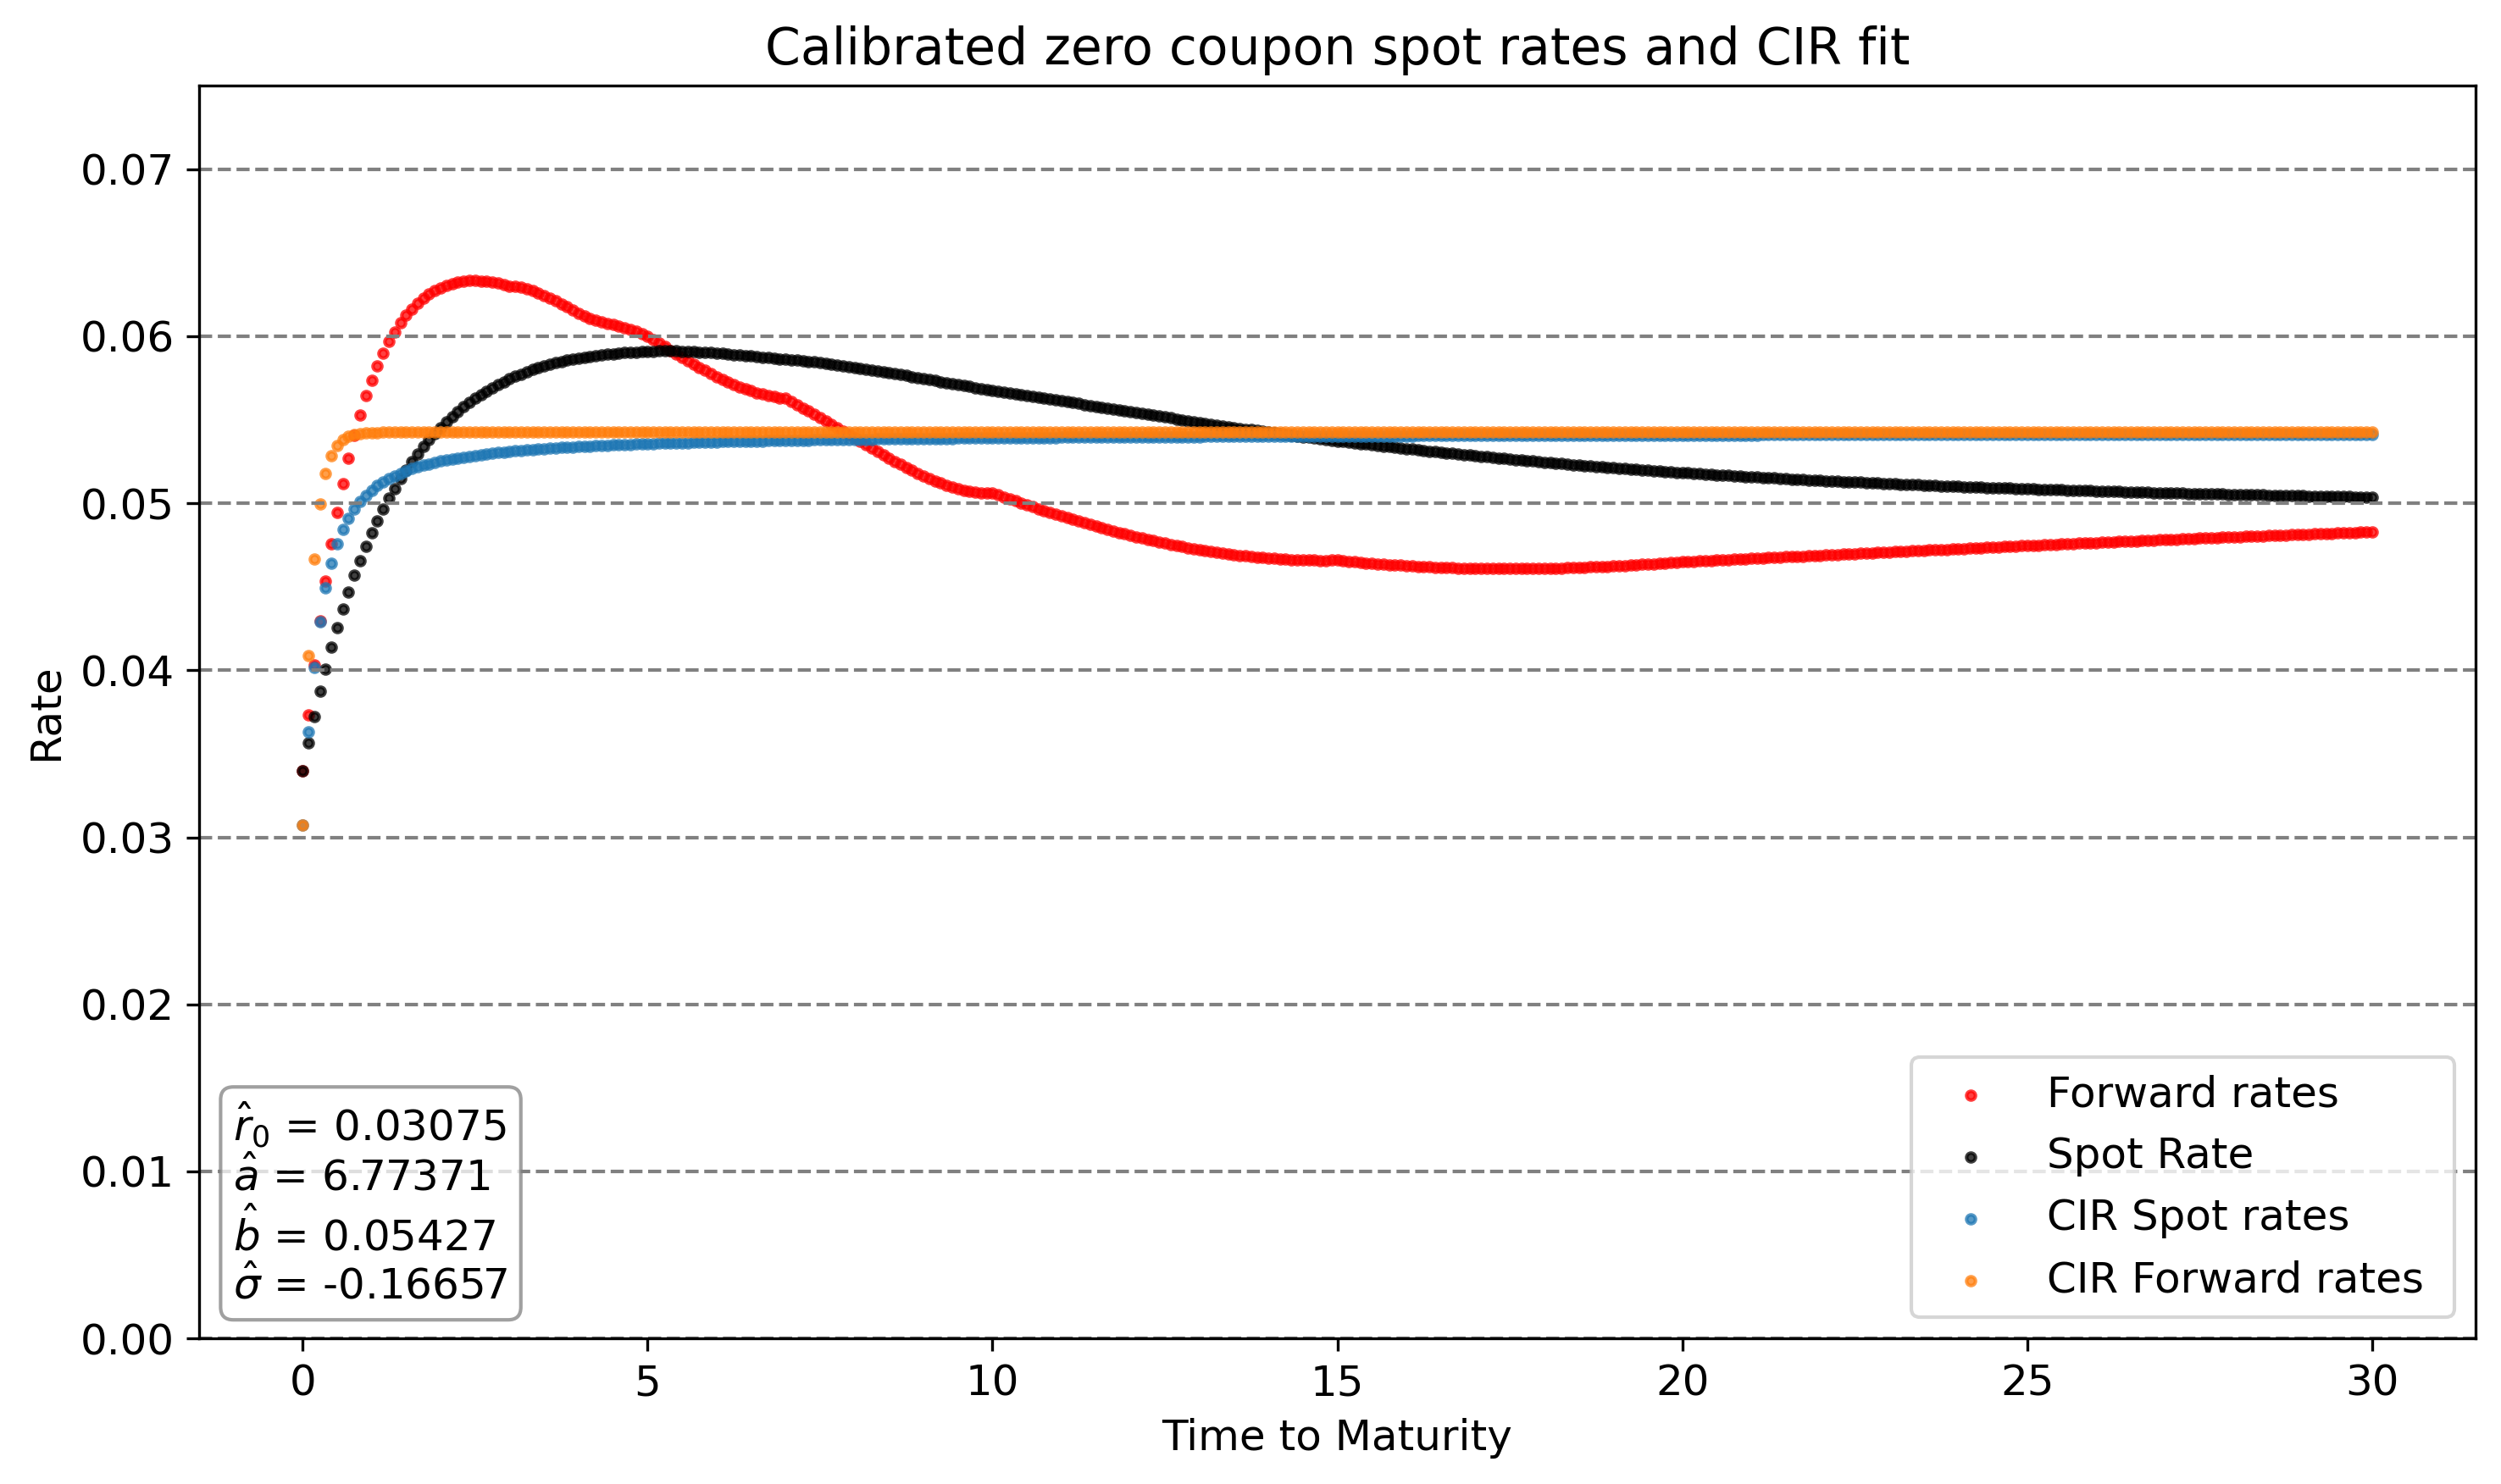

In [6]:
r0, a, b, sigma = 0.035, 0.5, 0.05, 0.1
param0 = r0, a, b, sigma
result = minimize(fid.fit_cir_obj,param0,method='nelder-mead',args=(R_inter,T_inter),options={'xatol': 1e-20,'disp': True})
r0_cir, a_cir, b_cir, sigma_cir = result.x
p_cir = fid.zcb_price_cir(r0_cir,a_cir,b_cir,sigma_cir,T_inter)
f_cir = fid.forward_rate_cir(r0_cir,a_cir,b_cir,sigma_cir,T_inter)
R_cir = fid.spot_rate_cir(r0_cir,a_cir,b_cir,sigma_cir,T_inter)
fit_cir = fit.copy()
fit_cir.append({'label':'CIR Spot rates', 'x':T_inter, 'y':R_cir,'s':25})
fit_cir.append({'label':'CIR Forward rates', 'x':T_inter, 'y':f_cir,'s':25})
text = {'$\hat{r}_0$':r0_cir,'$\hat{a}$':a_cir,'$\hat{b}$':b_cir,'$\hat{\sigma}$':sigma_cir}

plot.rates(fit_cir,title='Calibrated zero coupon spot rates and CIR fit',text=text)

#### (d) You are likely to have found that the Vasicek and CIR model produce almost identical fits but that neither fit the market well. Explain why that is the case
As previously mentioned and as we see in the plot Vasicek and CIR fit very bad to the data as we have a hump-shaped curve, which it cannot handle. They can only handle a monotonically increasing or decreasing curve (or flat); hence we see that it does not capture the hump or the following decrease at all


## Problem 4 - Fitting a Hull-White Extended Vasicek model to data
In this problem, we will fit a HWEV model to our market data and you can assume that $a = 0.15$ and $\sigma = 0.01$


#### (a) Use the function `fid.interpolate` to first find $\frac{\partial f^*(0,t)}{\partial T}$ and then find $\Theta (t)$

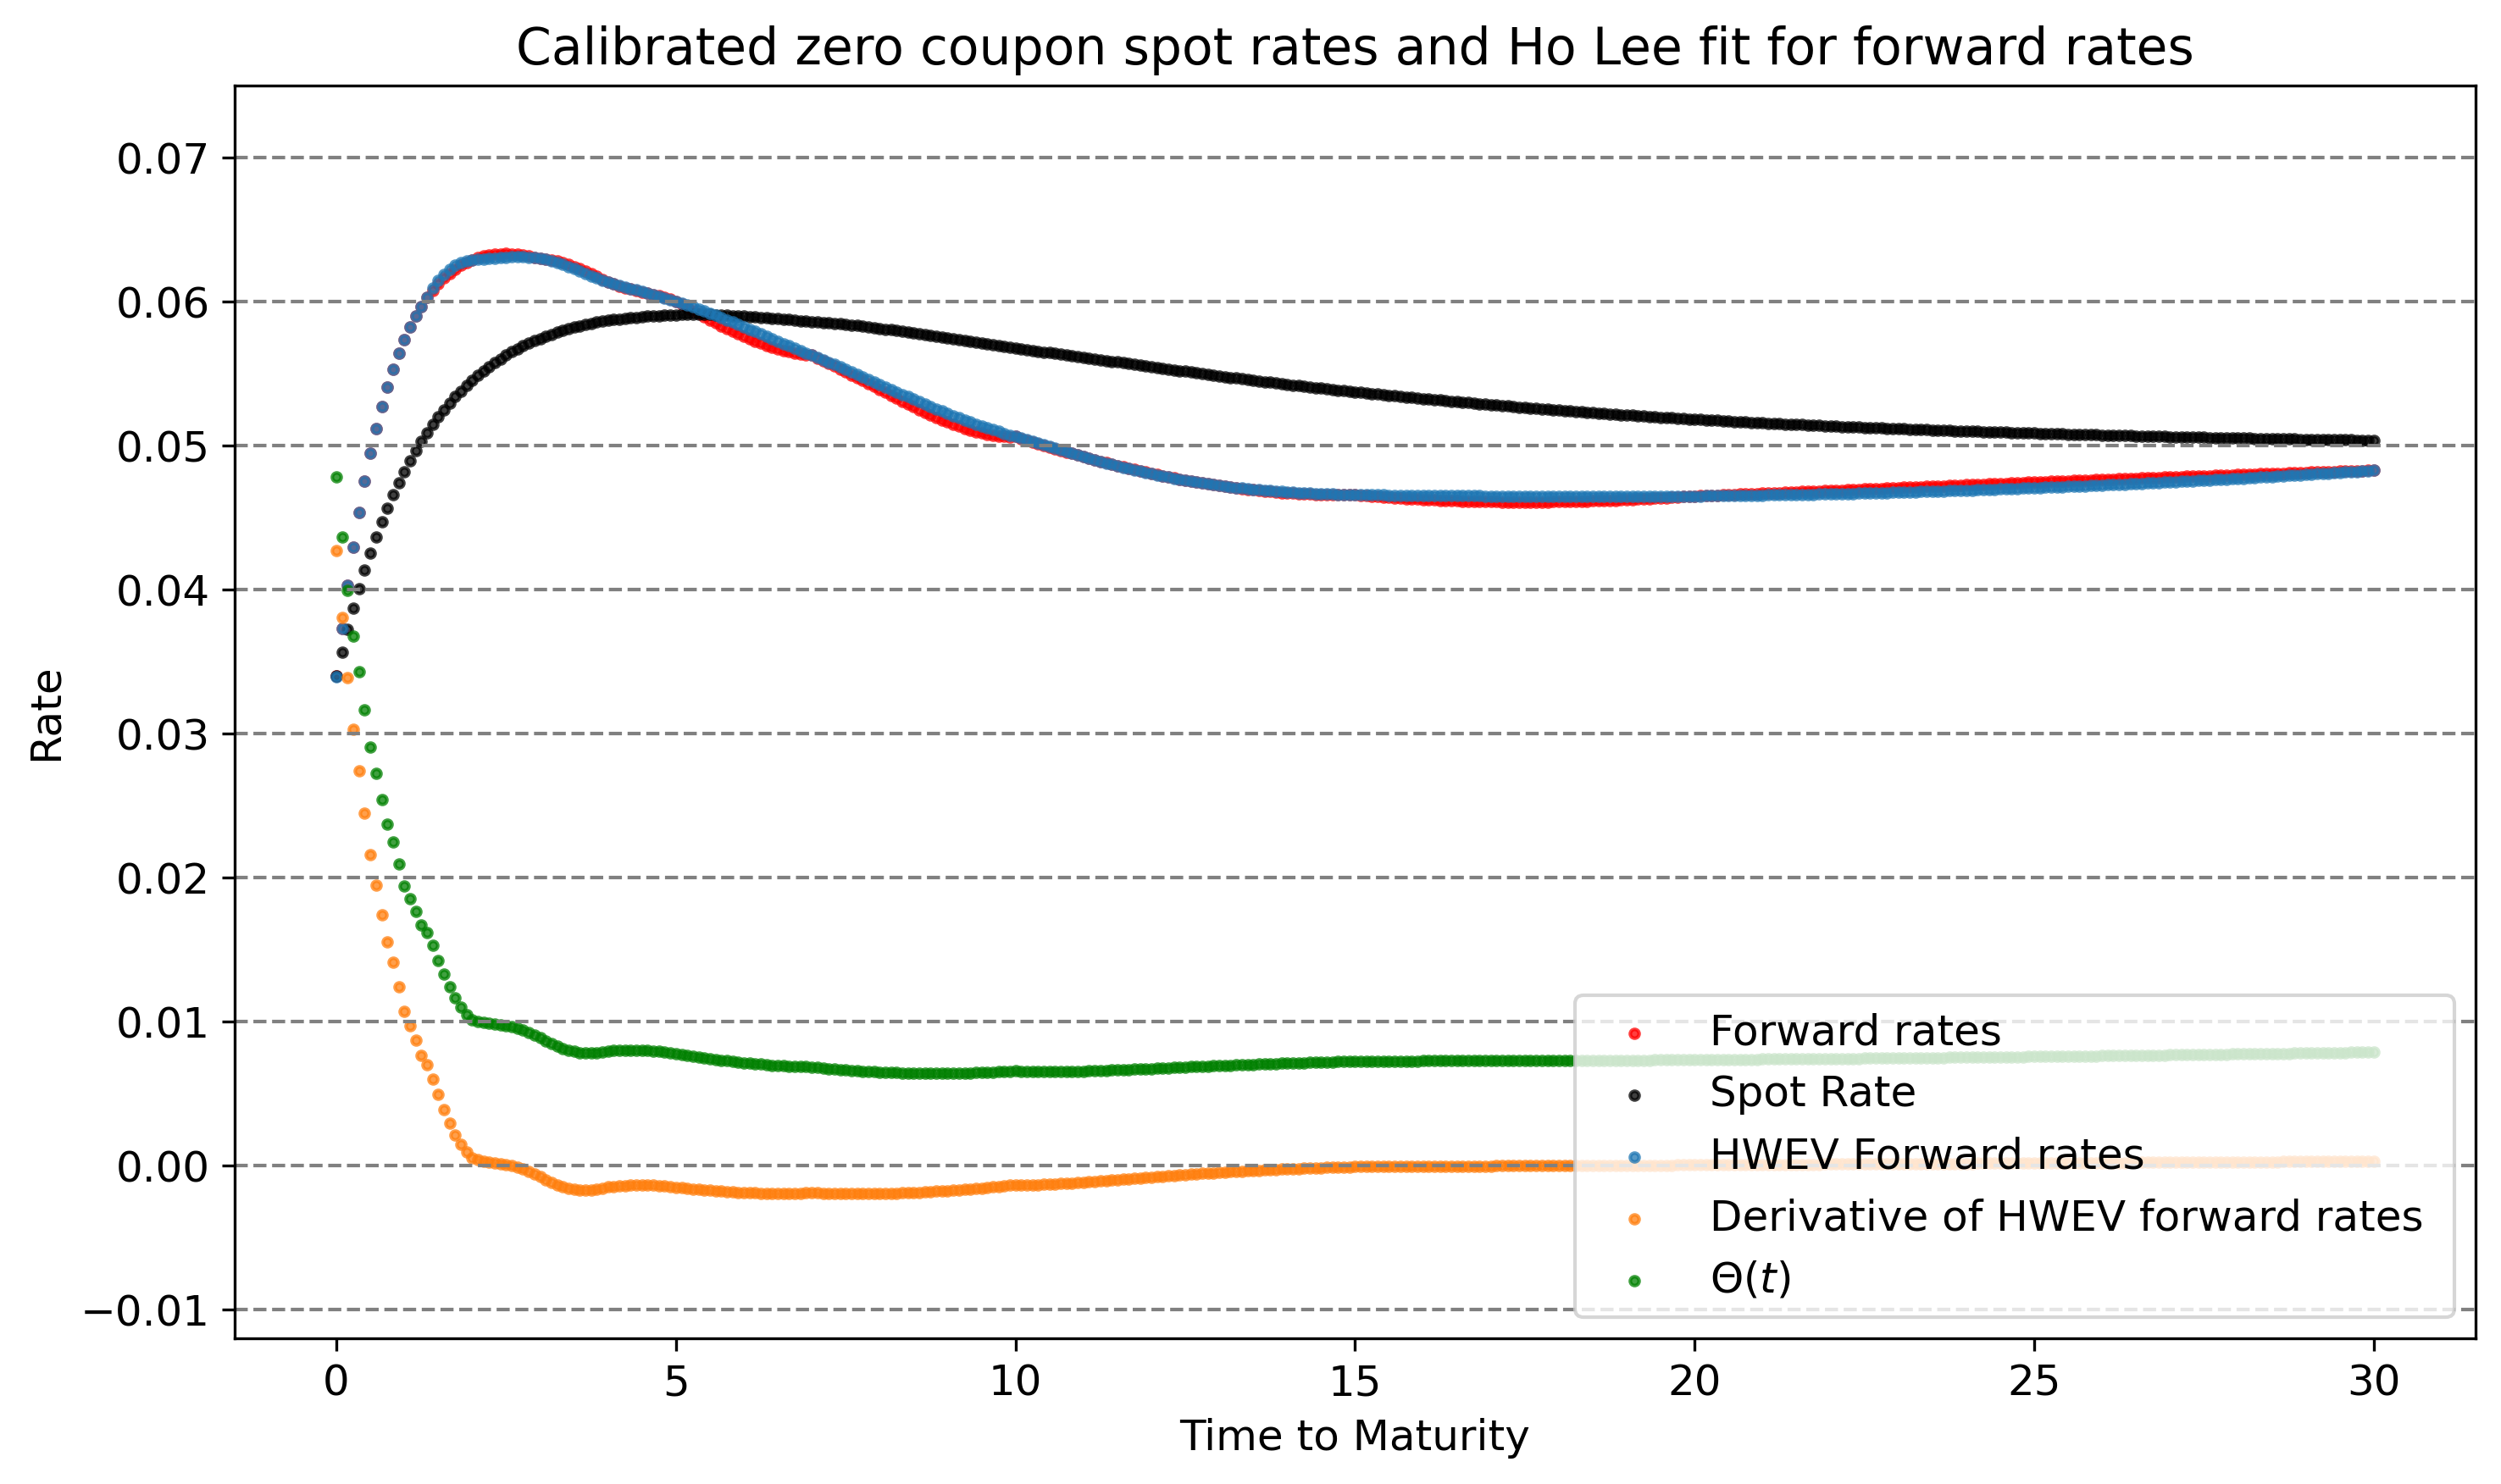

In [7]:
a, sigma = 0.15, 0.01
f_fit = np.array(fid.for_values_in_list_find_value_return_value(T_fit,T_inter,f_inter))
f_star, f_T_star = fid.interpolate(T_inter,T_fit,f_fit,interpolation_options)
theta_star = fid.theta_hwev(T_inter,f_star,f_T_star,a,sigma)
fit_hwev = fit.copy()
fit_hwev.append({'label':'HWEV Forward rates', 'x':T_inter, 'y':f_star,'s':25})
fit_hwev.append({'label':'Derivative of HWEV forward rates', 'x':T_inter, 'y':f_T_star,'s':25})
fit_hwev.append({'label':'$\Theta(t)$', 'x':T_inter, 'y':theta_star,'s':25,'color':'green'})

plot.rates(fit_hwev,title='Calibrated zero coupon spot rates and Ho Lee fit for forward rates')

#### Argue that the Hull-White Extended Vasicek model will by construction fit the initial term structure by appealing to
$$
\begin{split}
P(t, T) &= e^{A(t,T) - B(t,T)r_t} \\
A(t,T) &= \int_t^T \left(\frac{1}{2} \sigma^2 B(s,T)^2 - \Theta(s)B(s,T)\right) ds \\
B(t,T) &= \frac{1}{a}\left[1 - e^{-a(T-t)}\right]
\end{split}
$$

The Hull-White extended Vasicek model (and the Ho-Lee) is specifically designed to align with the observed market as the The drift parameter $\Theta(t)$ is a function and the parameter space in the HWEV model is infinite dimensional. Therefore, we are, unlike in the Vasicek and CIR mdoels, able to choose the function $\Theta(t)$ in the HWEV model such that we get a perfect fit of the initial term structure data at the initial time. 

By calibrating its parameters based on the current term structure of interest rates, it guarantees that the model accurately reflects the initial term structure, making it inherently consistent with the market's starting point. As a result, the HWEV model seamlessly fits the initial term structure by construction, providing a reliable foundation for pricing and hedging interest rate derivatives.


#### (c) Also argue that the neither $a$ and $\sigma$ are identified from the ZCB curve fit. That is, argue that the model will fit the data irrespective of the choice of $a$ and $\sigma$. How to find a reasonable choice for a will be discussed later.

When you fit the Vasicek you can always find $a$ and though not being totally well identified you can find $\sigma$ usually as well. This is not the case for HWEV. As $t\to 0$ we have $B(t,T) \neq 0$ in 
$$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{B(t,T)f^*(0,t)-\frac{\sigma^2}{4a}B^2(t,T)\left(1-e^{-2at}\right)-B(t,T)r_t\right\}$$
and we get
$$\lim_{t\to 0}p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{B(t,T)f^*(0,t)-B(t,T)r_t\right\}$$
At $t=0$ we know forward rate and spot rates must be equivalent and we get
$$\lim_{t\to 0}p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}$$
As this argument holds no matter $a$ and $\sigma$ these are not well identified in the model as we just chose $\Theta(t)$ following 
$$\Theta(t) = f^*_T(0,t) + g(t) + a\left[f^*(0,t)+g(t)\right]$$

## Problem 5 - Pricing an interest rate cap in the Hull-White Extended Vasicek model
We will now consider the pricing of an interest rate cap on a $10Y$ receiver swap in which the holder receives an annual fixed rate in exchange for paying 6M Euribor on the floating leg. As in the previous question, you can assume that $a = 0.15$ and $\sigma = 0.01$

#### (a) Explain the relationship between a caplet on an individual Euribor rate payment and also explain, how a caplet can be seen as a type of European option on a specific underlying asset
A caplet provides the holder the right to receive a payment if a specific Euribor rate exceeds a predetermined strike rate during a single interest period. Essentially, each caplet is tied to an individual Euribor rate payment, offering protection against rising interest rates for that period. Furthermore, a caplet functions similarly to a European call option, where the Euribor rate serves as the underlying asset. Just as a European option grants the right to buy an asset at a set price by a certain date, a caplet grants the right to benefit from higher-than-expected interest rates at a specific future time.

#### (b) Derive an explicit expression for the price of a European put option with the ZCB as the underlying asset

***See ChatGPT for proposed solution***

#### (c) Compute the prices of all caplets on 6M forward Euribor with a strike of $K = 0.06$ corresponding to the floating rate payments on the 10Y receiver swap and use these prices to find


In [8]:
strike = 0.06
sigma = 0.005
alpha = 0.25 # quarterly payments
T_cap = 10 # years
M_caplet = int(T_cap/alpha)
T_caplet = np.array([i*alpha for i in range(0,M_caplet+1)])
p_caplet = fid.for_values_in_list_find_value_return_value(T_caplet,T_inter,p_inter)
price_caplet = np.zeros([M_caplet+1])
for i in range(2,M_caplet+1):
    price_caplet[i] = (1 + (T_caplet[i]-T_caplet[i-1])*strike)*fid.euro_option_price_hwev(1/(1 + (T_caplet[i]-T_caplet[i-1])*strike),T_caplet[i-1],T_caplet[i],p_caplet[i-1],p_caplet[i],a,sigma,type = "put")
price_cap = sum(price_caplet[2:])
print(f"Caplet prices: {10000*price_caplet}")

Caplet prices: [0.00000000e+00 0.00000000e+00 2.38052781e-08 3.06729982e-02
 9.28777190e-01 3.27498311e+00 5.89614595e+00 7.96989344e+00
 9.38194187e+00 1.02717452e+01 1.06805507e+01 1.06631472e+01
 1.03552042e+01 1.01410819e+01 9.81185410e+00 9.13983316e+00
 8.30865202e+00 7.59215608e+00 7.18960189e+00 6.89036223e+00
 6.53820190e+00 5.89355215e+00 5.14358346e+00 4.52325973e+00
 4.03125938e+00 3.66216903e+00 3.40961091e+00 3.26887033e+00
 3.23900437e+00 3.04686228e+00 2.64570353e+00 2.28514418e+00
 1.96806851e+00 1.69556984e+00 1.46727005e+00 1.28177870e+00
 1.13727339e+00 1.03219886e+00 9.66126291e-01 9.40901331e-01
 9.62366701e-01]


#### (d) Compute the price of a 10Y interest rate cap with strike $K = 0.06$ on 6M Euribor and express the price of this cap both in terms of an upfront payment as well as a premium to be paid quarterly for 10 years.

In [9]:
S_swap = fid.accrual_factor_from_zcb_prices(0,0,T_caplet[-1],"semiannual",T_caplet,p_caplet)
premium_cap = alpha*(price_cap/S_swap) #this is the semiannual premium not quarterly
print(f"price_cap: {10000*price_cap}, semiannual premium_cap: {10000*premium_cap}")

price_cap: 187.6653781606178, semiannual premium_cap: 6.263273740084092


#### (e) Investigate how the price of the cap depends on $\sigma$ and compute the DV01 of changing $\sigma$ by $0.001$ both up and down

In [10]:
price_caplet_down = fid.caplet_prices_hwev(strike,a,sigma-0.001,T_caplet,p_caplet)
price_cap_down = sum(price_caplet_down[2:])
premium_cap_down = alpha*(price_cap_down/S_swap)
print(f"price_cap_down: {10000*price_cap_down}, premium_cap_down: {10000*premium_cap_down}")
price_caplet_up = fid.caplet_prices_hwev(strike,a,sigma+0.001,T_caplet,p_caplet)
price_cap_up = sum(price_caplet_up[2:])
premium_cap_up = alpha*(price_cap_up/S_swap)
print(f"price_cap_up: {10000*price_cap_up}, premium_cap_up: {10000*premium_cap_up}")

price_cap_down: 154.19991178557544, premium_cap_down: 5.146374188334722
price_cap_up: 223.16619797924247, premium_cap_up: 7.4481025811884125


## Problem 6 - Simulation of $r_t$ and confidence intervals in the Hull-White Extended Vasicek model
Now we will simulate short rates in the HWEV model using the usual first order Euler scheme on a grid of mesh $\delta$ that runs from initial time $t_0$ to terminal time $T$. Denote by $M$, the number of steps in your simulation. The time points in your simulation will be numbered $m = 0,1,2,...,M−1,M$, the time points will be $[t_0,t_1,...,t_{M−1},t_M] = [0,\delta,2\delta,...,T_{-\delta},T]$ and $\delta = \frac{T}{M}$.

#### (a) Develop an Euler scheme to simulate the short rate given $\Theta(t)$ expressed in terms of market observed forward rates
**Euler Scheme:**
$$
\begin{split}
r_{m+1} &= r_{m} + (\Theta(t_m) - a r_m) \delta + \sigma \sqrt{\delta} Z_m \\
&= r_m \left[ f^*_T(0,t) + g(t) + a\left(f^*(0,t)+g(t)\right)\right]\delta - a r_m \delta + \sigma \sqrt{\delta} Z_m \\
Z_{m} &\sim \mathcal{N}(0, 1) \\
\end{split}
$$

#### (b) To construct confidence intervals in the HWEV model, we run into the problem that the mean of $r_T \mid \mathcal{F}_0$ is given by $$\mathbb{E}[r_t\mid \mathcal{F}_0]=e^{-aT}r_0+ \int_0^T e^{-a(T-s)}\Theta(s)ds$$ which is problematic since the integral can not immediately be computed. However, as we will see, a numerical solution can easily be implemented. Argue that the integral can be approximated by $$I = \int_0^T e^{-a(T-s)}\Theta(s)ds \approx \frac{1}{2}e^{-aT}\sum_{m=1}^{M} \left[e^{(m-1)\delta}\Theta((m-1)\delta)+e^{m\delta}\Theta(m\delta)\right]$$ and use this to write a function in Python that return the mean of $r_T \mid \mathcal{F}_0$ for a vector of $T$’s.

***See ChatGPT for proposed solution***

#### (c) Plot simulated values of $r_t$ for $t \in [0,30]$ along with the mean of $r_t$, $\Theta(t)$ and a 95% two-sided confidence interval

In [11]:
M_simul, T_simul = 3000, 30
mesh_simul = T_simul/M_simul
t_simul = np.array([i*mesh_simul for i in range(0,M_simul+1)])
size_ci = 0.95

np.random.seed(2025)
f_simul, f_T_simul = fid.interpolate(t_simul,T_fit,f_fit,interpolation_options)
theta = fid.theta_hwev(t_simul,f_simul,f_T_simul,a,sigma)
r_simul_euler = fid.simul_hwev(f_simul[0],t_simul,theta,a,sigma,method = "euler")
mean_hwev, var_hwev = fid.mean_var_hwev(a, sigma, t_simul, f_simul, f_T_simul)
lb, ub = fid.ci_hwev(a,sigma,t_simul,f_simul,f_T_simul,size_ci,type_ci='two_sided')

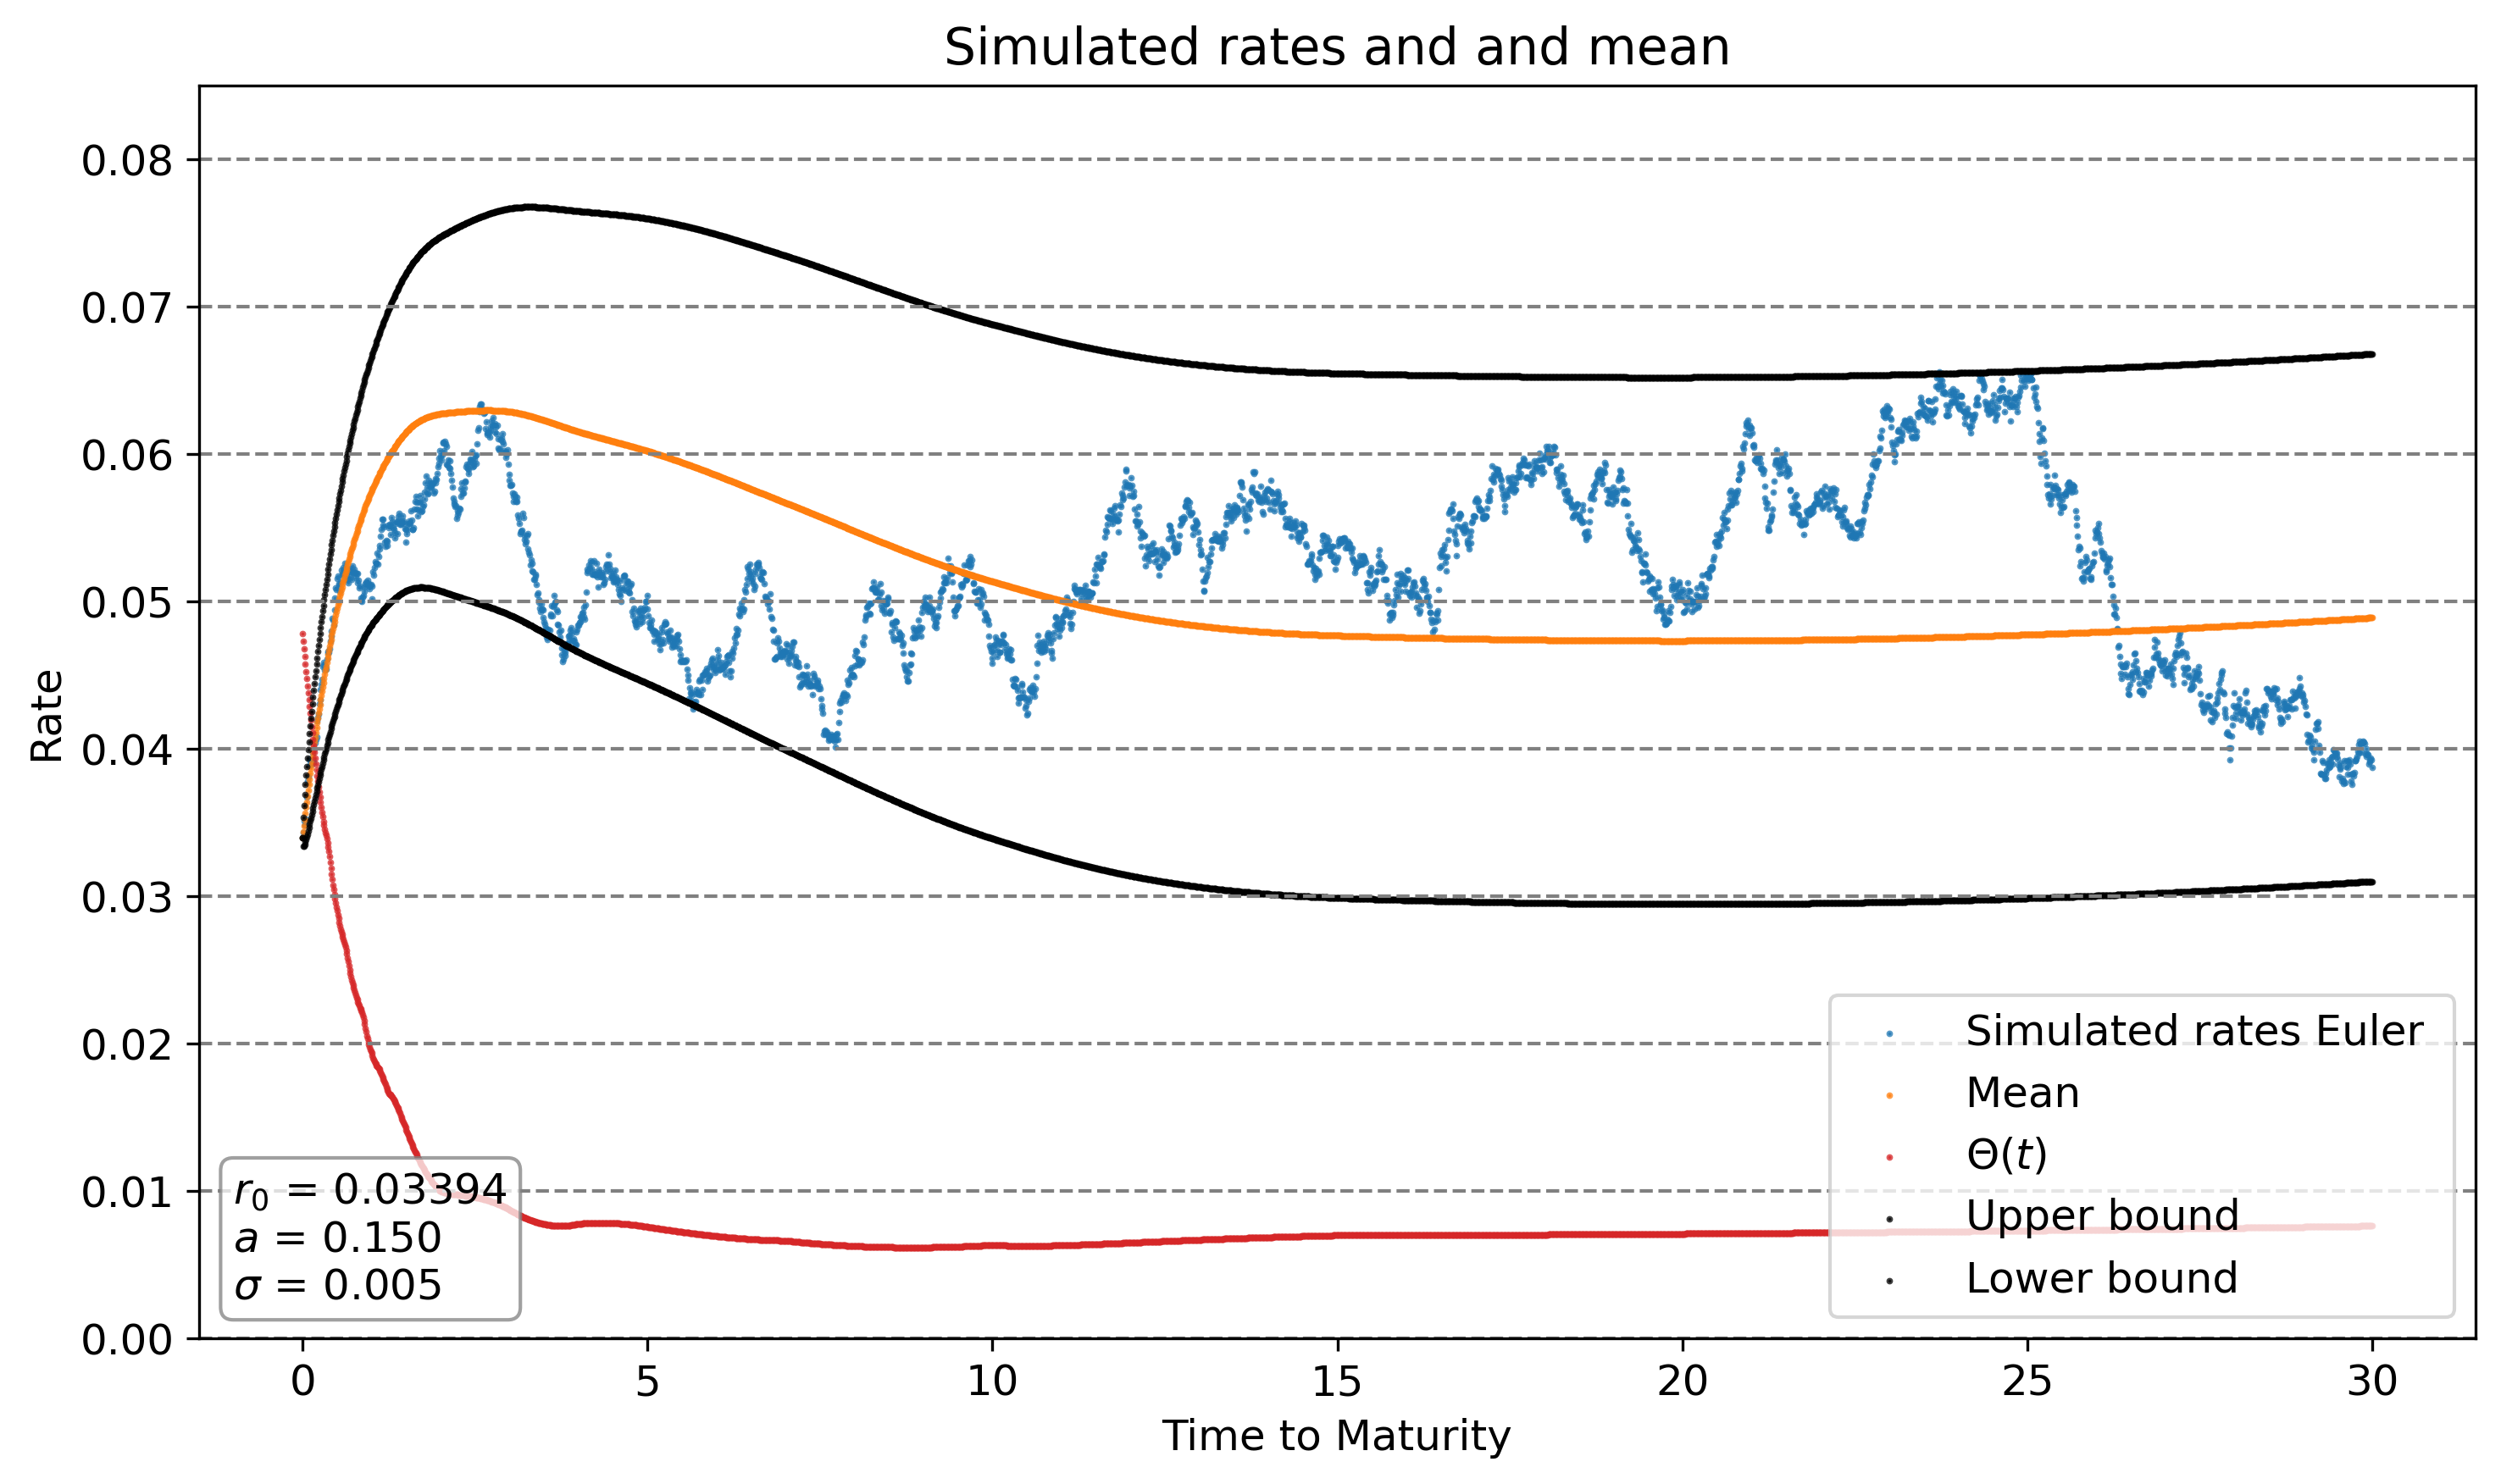

In [12]:
simul_rates = [{'label':'Simulated rates Euler', 'x':t_simul, 'y':r_simul_euler,'s':3},
               {'label':'Mean', 'x':t_simul, 'y':mean_hwev,'s':3},
               {'label':'$\Theta(t)$', 'x':t_simul, 'y':theta,'s':3},
               {'label':'Upper bound', 'x':t_simul,'y':ub,'color':'black','s':3},
               {'label':'Lower bound', 'x':t_simul,'y':lb,'color':'black','s':3}]
text = {'$r_0$':f'{f_simul[0]:.5f}', '$a$':f'{a:.3f}', '$\sigma$':f'{sigma:.3f}'}

plot.rates(simul_rates,title='Simulated rates and and mean',text=text)

#### (d) Assess what happens to the distribution of the short rate in the HWEV model when $t$ grows large. Does the short rate mean-revert in this model and does it make sense to talk about the ”asymptotic” properties of $r_t$ in the HWEV model?
In the HWEV model as time $t$ progrsses, the distribution of the short rate, $r_t$ converges to a nomal distritbution centered around $\frac{\Theta}{a}$ with variance $\frac{\sigma^2}{2a}$.
The presence of the mean-reversion term $-ar_t$ guarantees that $r_t$ does not drift indefinitely but instead stabilizes around its long-term mean.
The stabilization of both the mean and variance of $r_t$ as $t\to \infty$ validates the discussion of asymptotic properties within the HWEV framework, enhancing its applicability for long-term financial modeling.

#### (e) Redo the plot for the choice of $a$ found when fitting the Vasicek model. What happens and what does that tell you about fitting a Vasicek model to find an appropriate choice for a in a HWEV model?

I will here use the parameter $b^{Vasicek}$ as $b$ is the parameter governing mean reversion not $a$.

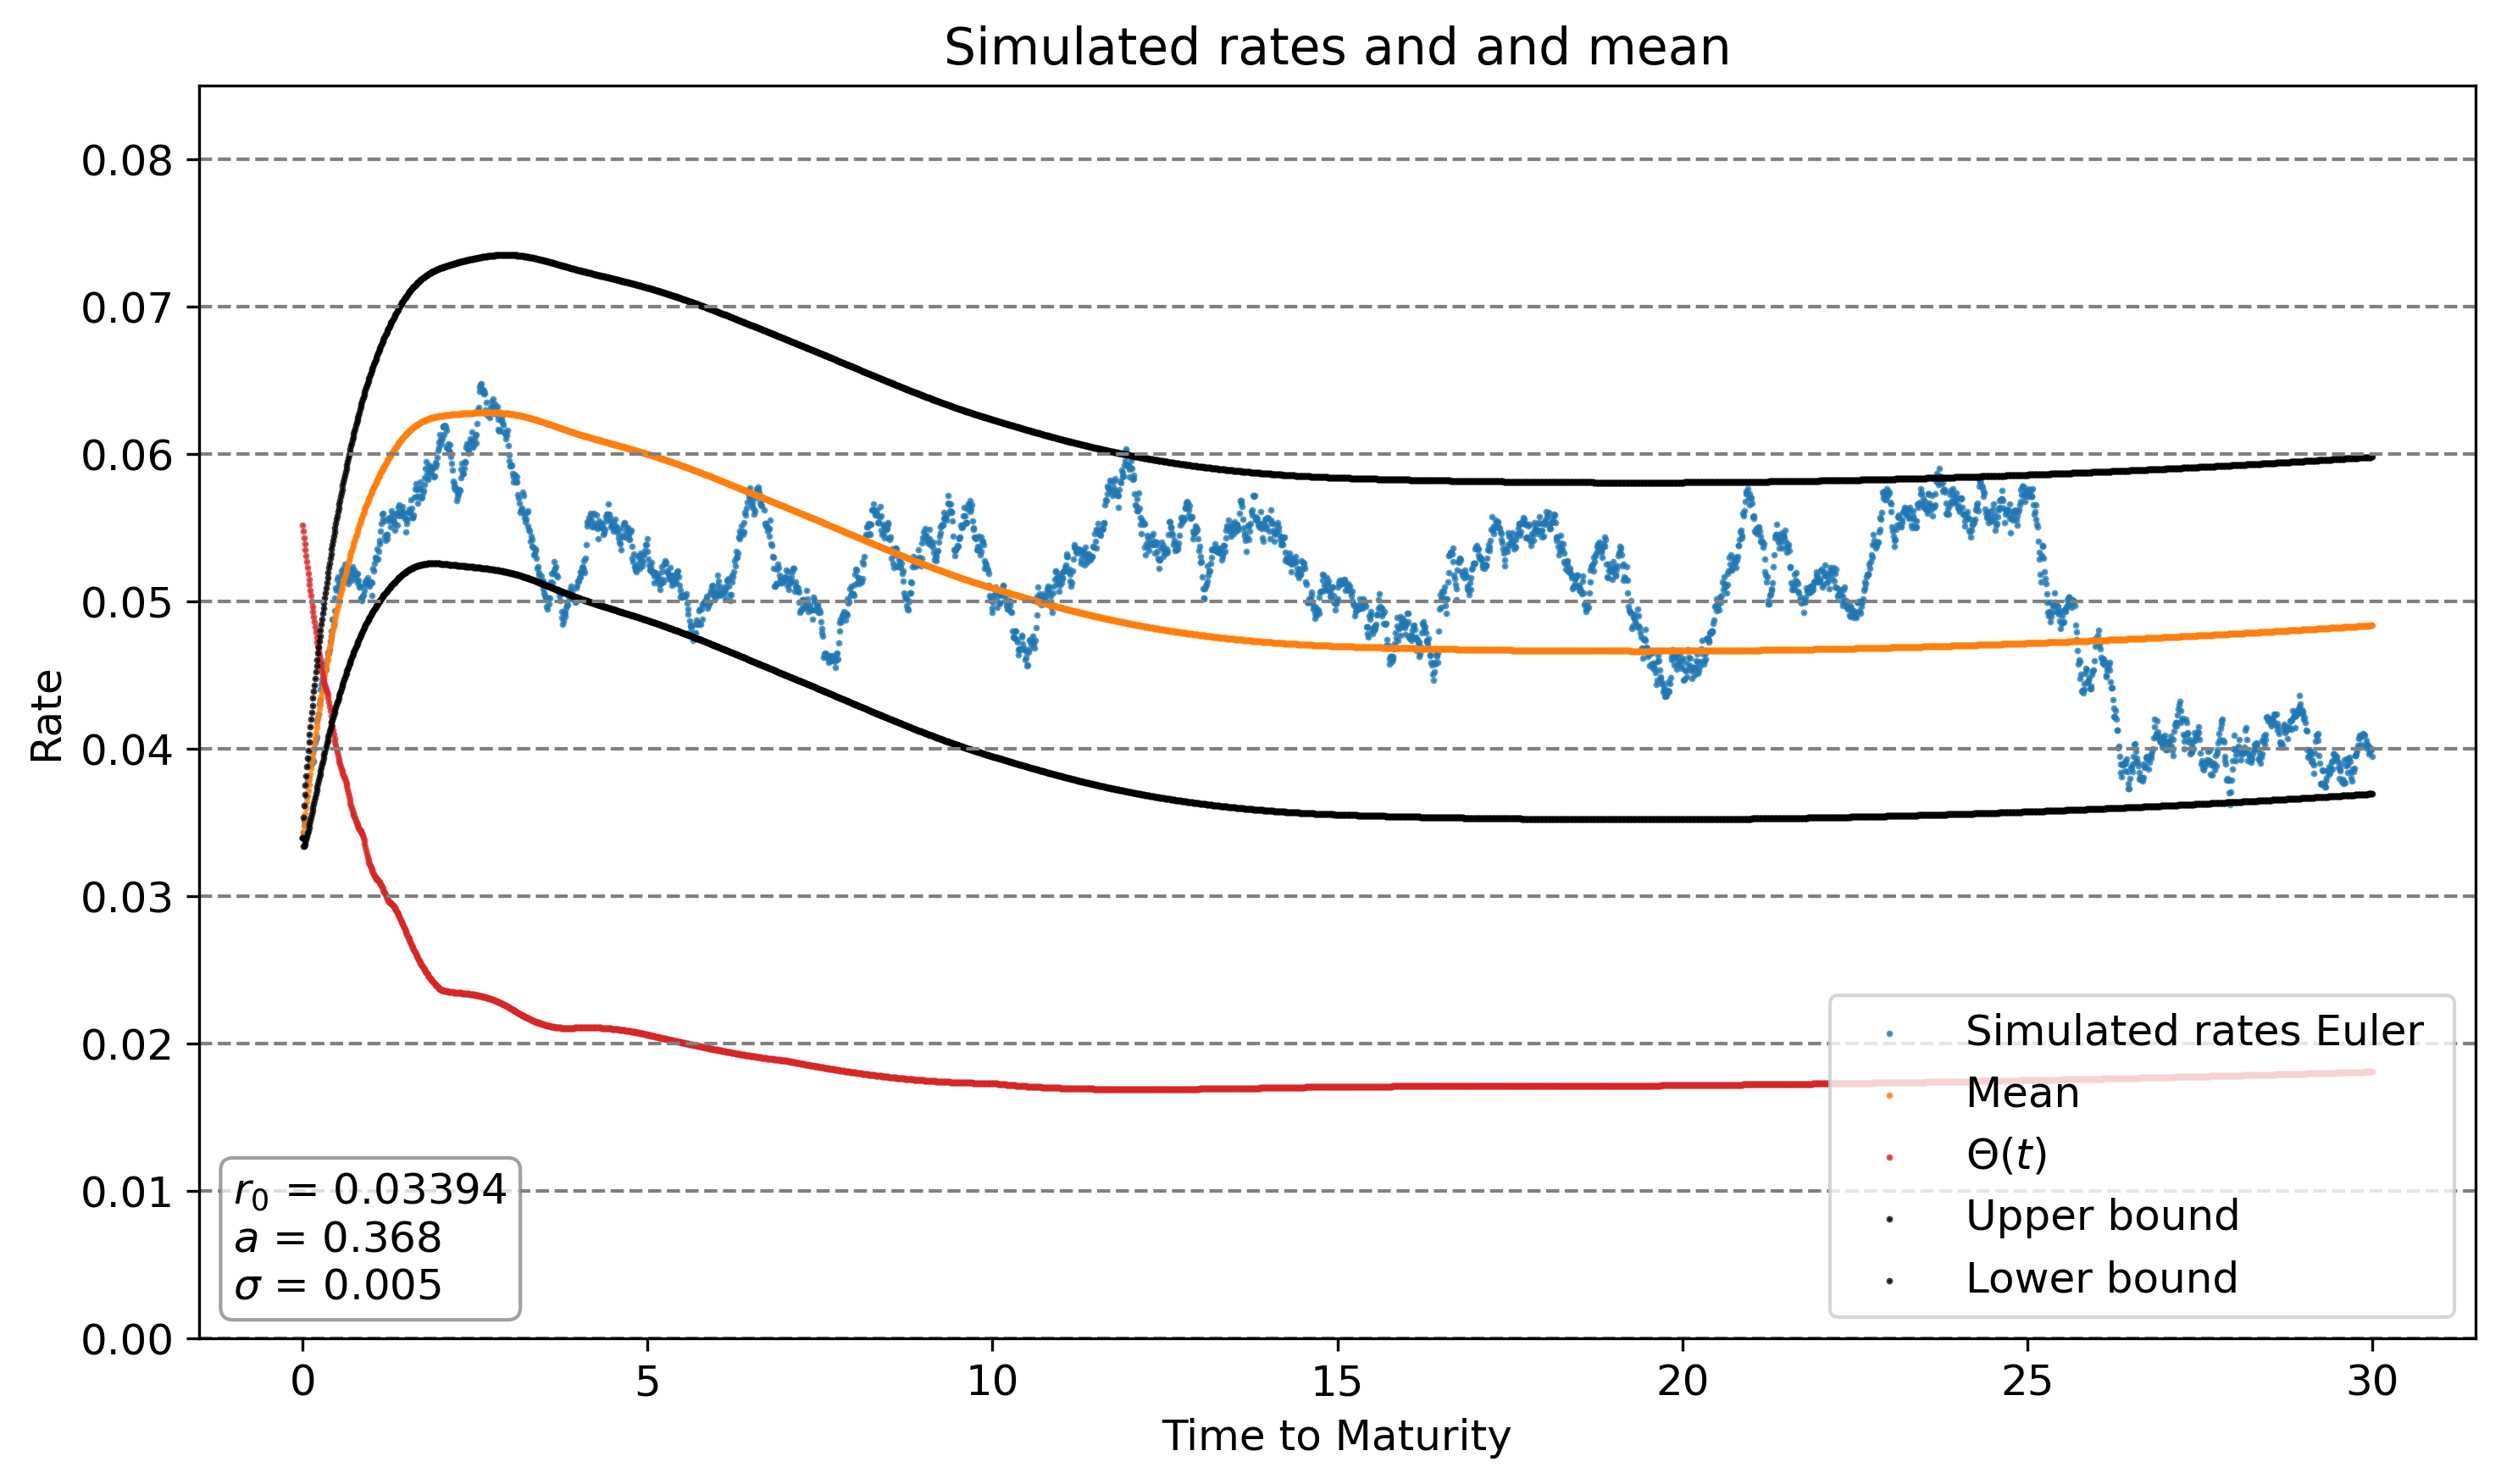

In [13]:
M_simul, T_simul = 3000, 30
mesh_simul = T_simul/M_simul
t_simul = np.array([i*mesh_simul for i in range(0,M_simul+1)])
size_ci = 0.95

np.random.seed(2025)
f_simul, f_T_simul = fid.interpolate(t_simul,T_fit,f_fit,interpolation_options)
theta = fid.theta_hwev(t_simul,f_simul,f_T_simul,b_vasicek,sigma)
r_simul_euler = fid.simul_hwev(f_simul[0],t_simul,theta,b_vasicek,sigma,method = "euler")
mean_hwev, var_hwev = fid.mean_var_hwev(b_vasicek, sigma, t_simul, f_simul, f_T_simul)
lb, ub = fid.ci_hwev(b_vasicek,sigma,t_simul,f_simul,f_T_simul,size_ci,type_ci='two_sided')

simul_rates = [{'label':'Simulated rates Euler', 'x':t_simul, 'y':r_simul_euler,'s':3},
               {'label':'Mean', 'x':t_simul, 'y':mean_hwev,'s':3},
               {'label':'$\Theta(t)$', 'x':t_simul, 'y':theta,'s':3},
               {'label':'Upper bound', 'x':t_simul,'y':ub,'color':'black','s':3},
               {'label':'Lower bound', 'x':t_simul,'y':lb,'color':'black','s':3}]
text = {'$r_0$':f'{f_simul[0]:.5f}', '$a$':f'{b_vasicek:.3f}', '$\sigma$':f'{sigma:.3f}'}

plot.rates(simul_rates,title='Simulated rates and and mean',text=text)


We see that when we use an $a$ twice as large, the confidence band are much narrower and we get less variation in the short rate. This is because the mean reversion is much stronger and the short rate is pulled back to the mean much faster.

## Problem 7 - Pricing a swaption in the Hull-White Extended Vasicek model
Finally, we will find the price of a $1Y10Y$ receiver swaption with a strike of $K = 0.06$. The receiver swaption gives the owner the right but not obligation to enter into an $4Y$ receiver swap at exercise in $T_n = 1$ years. To compute the price of this swaption, you will need to simulate the short rate.

#### (a) Argue that the payoff function $\chi(T_n)$ and the discounted payoff function $\tilde{\chi}(T_n)$ of the payer swaption are $$ \chi(T_n) = S_n^N(T_n)(K-R_n^N(T_n))_+ $$ $$\tilde{\chi}(T_n) = \exp\left\{-\int_0^{T_n}r_tdt\right\}S_n^N(T_n)(K-R_n^N(T_n))_+$$

At the exercise time $T_n=1$ year, the holder has the right to enter into a 4-year receiver swap. The **payoff function** $\chi(T_n)$ represents the net benefit from exercising this option. Specifically, if the prevailing swap rate $R_n^N(T_n)$ is below the strike of $K=0.06$, the holder benefits by receiving the higher fixed rate $K$ instead of the (lower) market rate. This benefin is scaled by the swap annuity $S_n^N(T_n)$, leading to 
$$ \chi(T_n) = S_n^N(T_n)(K-R_n^N(T_n))_+ $$
where $(\cdot)_+$ denotes the positive part.
The **discounted payoff function** $\tilde{\chi}(T_n)$ accounts for the present value of the future payoff by discounting it back to the initial time using the accumulated short rates This ensures that the option price reflects the time value of money under the HWEV model.
$$\tilde{\chi}(T_n) = \exp\left\{-\int_0^{T_n}r_tdt\right\}S_n^N(T_n)(K-R_n^N(T_n))_+ = \exp\left\{-\int_0^{T_n}r_tdt\right\}\chi(T_n)$$
Thus, by structuring the payoff and its discounting in this manner, the HWEV model ensures that the receiver swaption's price accurately captures the economic benefits and risks associated with entering the swap at the specified strike rate.

#### (b) Find a method to compute the price at $t = 0$ of the swaption by simulating at least $N = 1000$ trajectories and having at least $M = 1000$ steps in your simulation

In [14]:
strike = 0.06
T_n, T_N, alpha = 1, 11, 0.5
M_simul_swaption, N_simul = 2000, 5000
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul]), np.zeros([N_simul]), np.zeros([N_simul])
mesh_simul_swaption = T_n/M_simul_swaption
t_swaption = np.array([i*mesh_simul_swaption for i in range(0,M_simul_swaption+1)])
f_swaption, f_T_swaption = fid.interpolate(t_swaption,T_fit,f_fit,interpolation_options)
f_t = fid.for_values_in_list_find_value_return_value(T_n,T_inter,f_star)
T_swaption = np.array([i*alpha for i in range(2,int(T_N/alpha)+1)])
p_swaption = fid.zcb_price_hwev(T_n,T_swaption,0,a,sigma,T_inter,p_inter,f_t)
T_swap = np.array([i*alpha for i in range(0,int((T_N-T_n)/alpha)+1)])
B = (np.ones(len(T_swap)) - np.exp(-a*T_swap))/a
theta_swaption = fid.theta_hwev(t_swaption,f_swaption,f_T_swaption,a,sigma)
np.random.seed(2025)
for i in range(0,N_simul):
    r_simul_swaption = fid.simul_hwev(f_swaption[0],t_swaption,theta_swaption,a,sigma,method = "euler",seed = None)
    p_swap = p_swaption.copy()
    for j in range(0,len(B)):
        p_swap[j] = p_swaption[j]*np.exp(-B[j]*r_simul_swaption[-1])
    R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"semiannual",T_swap,p_swap)
    chi[i] = max(strike-R_swap,0)*S_swap
    price_swaption_simul[i] = np.exp(-(T_n/M_simul_swaption)*sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1)
print(f"price_swaption: {price_swaption_plot[-1]*10000} bps")

price_swaption: 141.7735971564455 bps


#### (b) Investigate if the price you have computed is accurate by plotting the value of the derivative for various choices of $N$

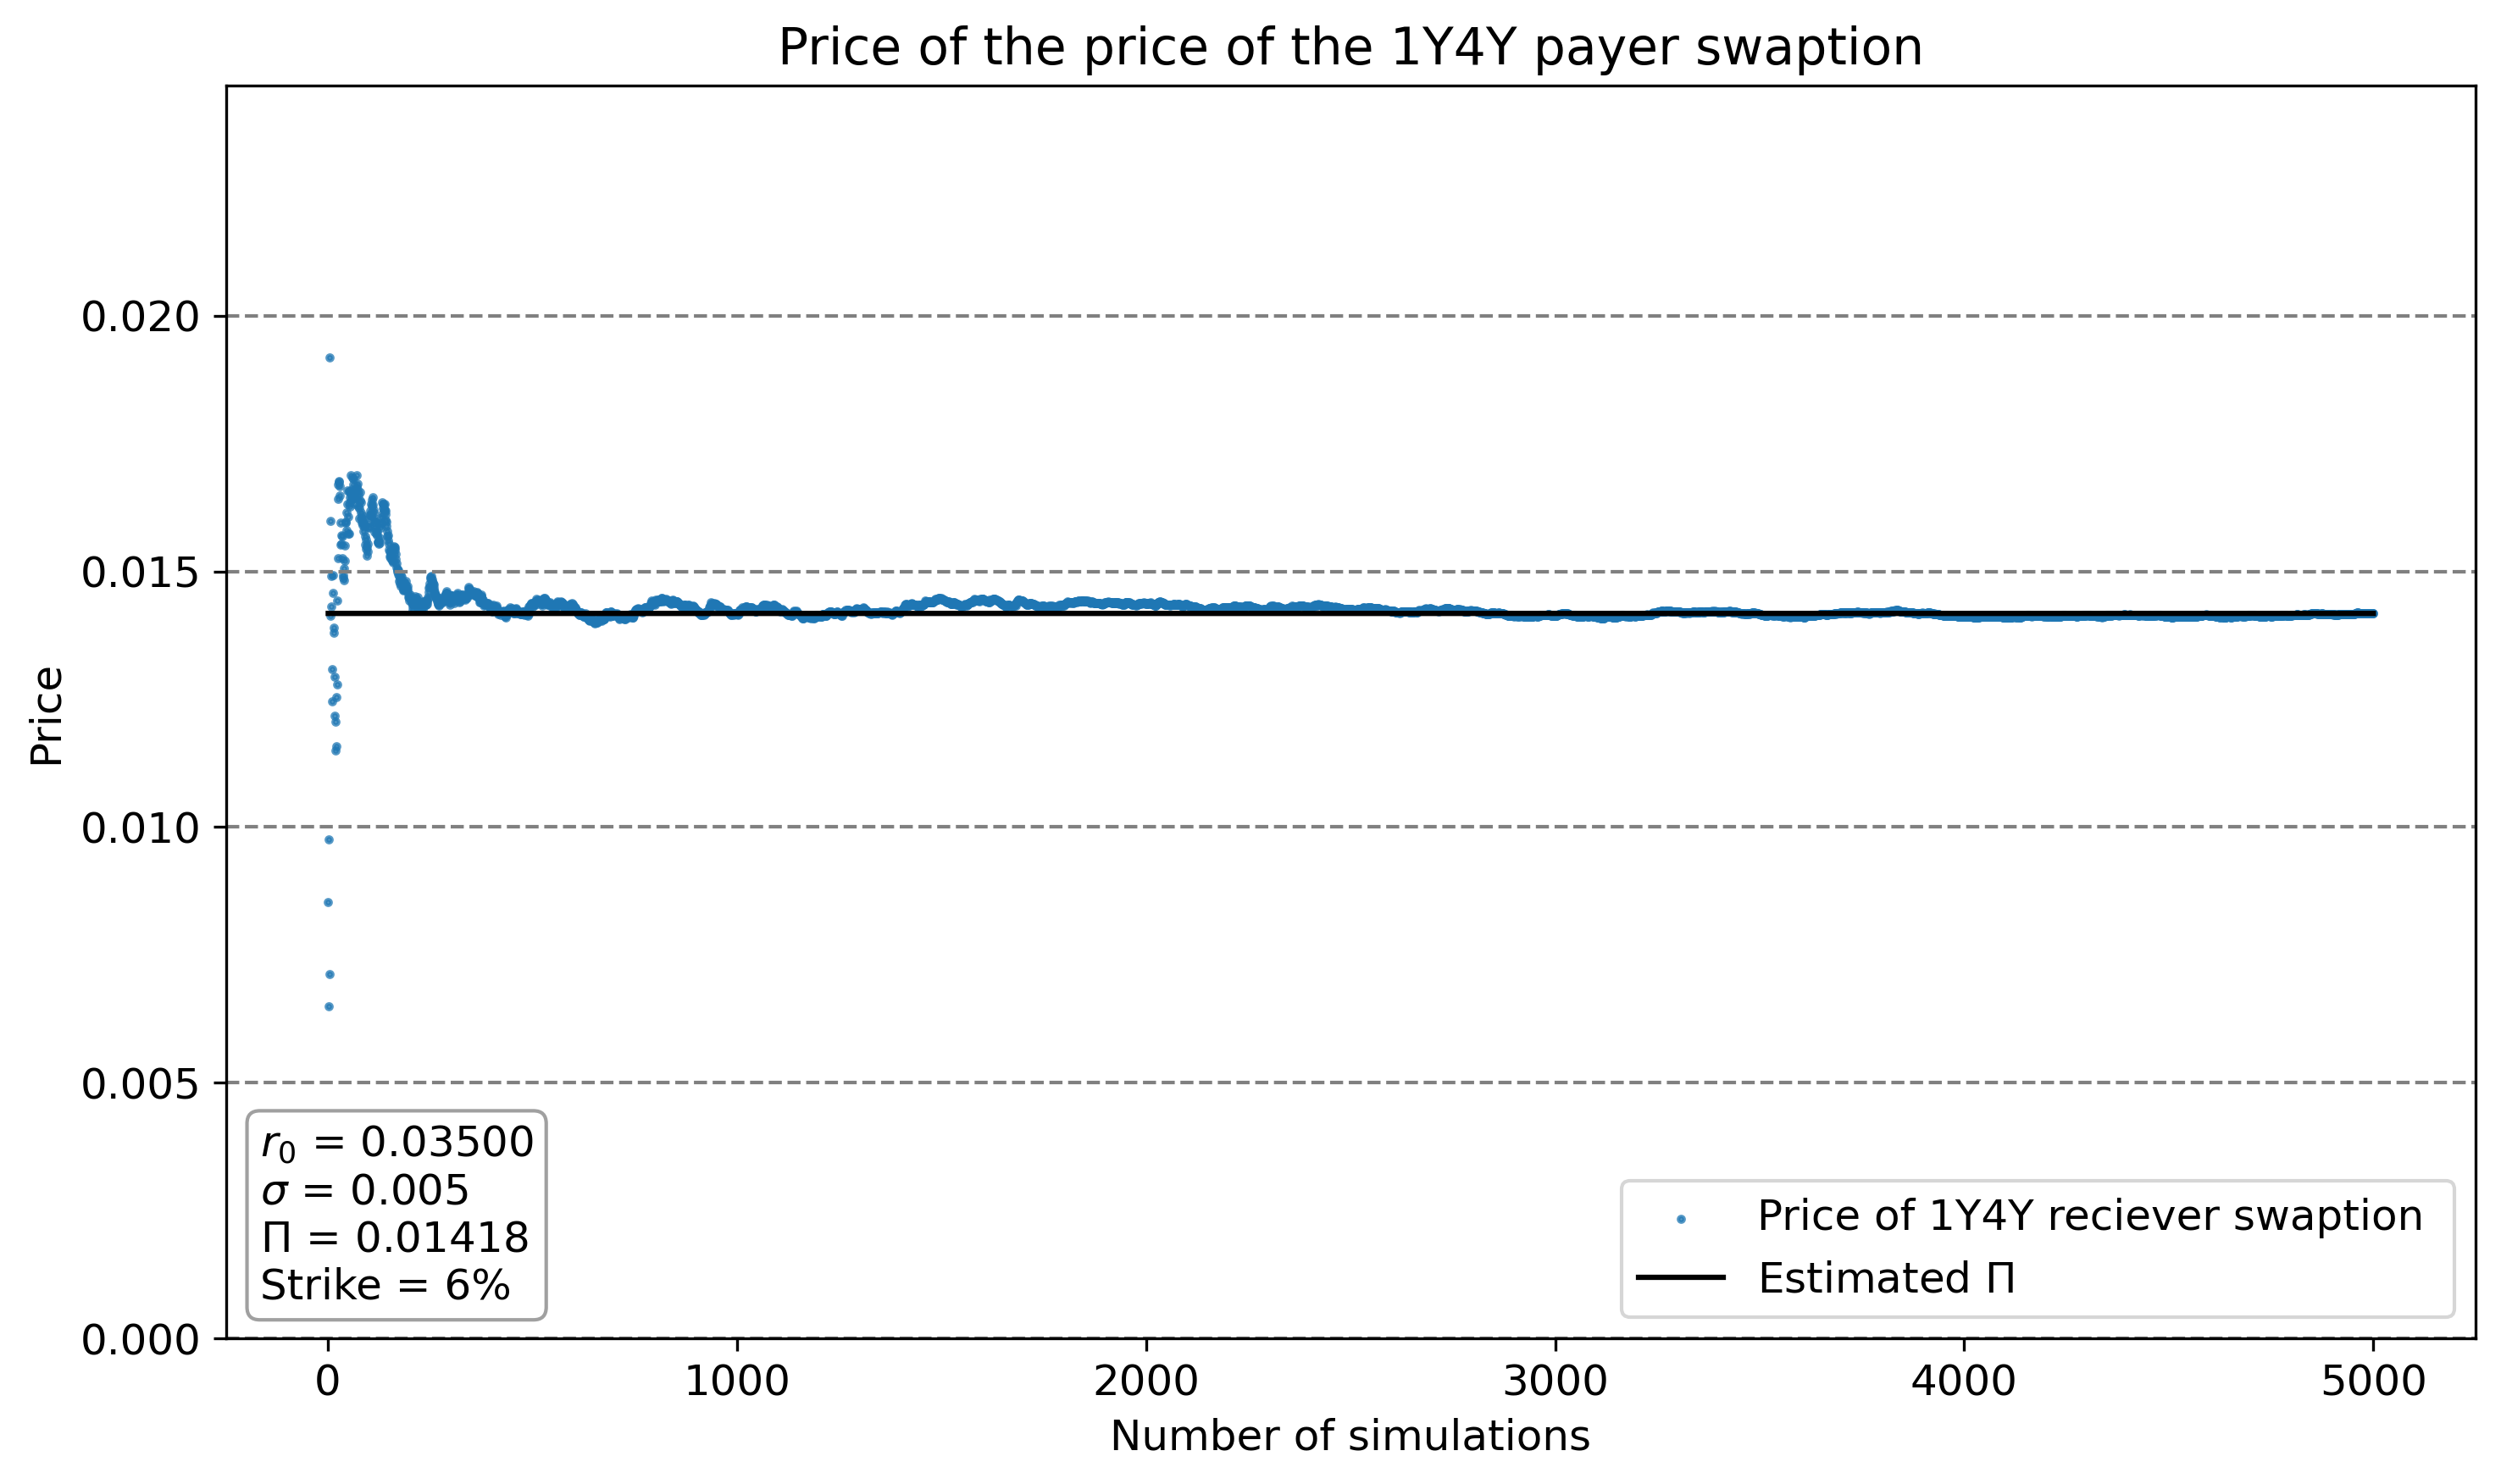

In [15]:
swap_plot = [{'label':'Price of 1Y4Y reciever swaption','x':np.arange(1,N_simul+1),'y':price_swaption_plot},
             {'label':'Estimated $\Pi$','x':np.arange(1,N_simul+1),'y':price_swaption_plot[-1]*np.ones([N_simul]),'type':'line', 'color':'black'}]
text = {'$r_0$':f'{r0:.5f}', '$\sigma$':f'{sigma:.3f}', '$\Pi$':price_swaption_plot[-1], 'Strike':f'{strike:.0%}'}

plot.rates(swap_plot, title='Price of the price of the 1Y4Y reciever swaption',xlabel='Number of simulations', ylabel='Price',text=text)

We see that already around 1000 simultions in the price has converged at $\sim 210$ BPS

#### (d) Explain how the price of the swaption depends on $\sigma$, $T_n$, $T_N$ and of course $K$
- $\sigma \uparrow \Rightarrow$ Swaption Price $\uparrow$ 
- $T_n \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $T_N \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $K \uparrow \Rightarrow$ Swaption Price $\downarrow$

***See ChatGPT or Ho-Lee for explanation***

#### (e) Finally, we will introduce a digital option that pays one unit of currency if the strike $K$ exceeds the $10Y$ par swap rate at the time of exercise in $1Y$. Find expression for the pay-off function $\chi(T_n)$ and the discounted pay-off function  $\tilde{\chi}(T_n)$ in terms of the indicator function $\mathbb{1}$

The digital option pays 1 if the condition is met and 0 otherwise; hence, the **payoff function** $\chi(T_n)$ is given by
$$
\chi(T_n) = \mathbb{1}(K > R_n^N(T_n))
$$
The **discounted payoff function** $\tilde{\chi}(T_n)$ incorporates the present value of this payoff by discounting it back to the initial time using the accumulated short rates.

$$
\tilde{\chi}(T_n) = \exp\left\{-\int_0^{T_n}r_tdt\right\}\mathbb{1}(K > R_n^N(T_n)) = \exp\left\{-\int_0^{T_n}r_tdt\right\}\chi(T_n)
$$

#### (e) Compute the price of the digital option and give an interpretation of the price in terms of the behavior of the underlying $10Y$ par swap rate

In [16]:
strike = 0.06
T_n, T_N, alpha = 1, 11, 0.5
M_simul_digital, N_simul = 2000, 5000
chi, price_digital_simul, price_digital_plot = np.zeros([N_simul]), np.zeros([N_simul]), np.zeros([N_simul])
mesh_simul_digital = T_n/M_simul_digital
t_digital = np.array([i*mesh_simul_digital for i in range(0,M_simul_digital+1)])
f_digital, f_T_digital = fid.interpolate(t_digital,T_fit,f_fit,interpolation_options)
f_t = fid.for_values_in_list_find_value_return_value(T_n,T_inter,f_star)
T_digital = np.array([i*alpha for i in range(int(T_n/alpha),int(T_N/alpha)+1)])
p_digital = fid.zcb_price_hwev(T_n,T_digital,0,a,sigma,T_inter,p_inter,f_t)
T_swap = np.array([i*alpha for i in range(0,int((T_N-T_n)/alpha)+1)])
B = (np.ones(len(T_swap)) - np.exp(-a*T_swap))/a
theta_digital = fid.theta_hwev(t_digital,f_digital,f_T_digital,a,sigma)
np.random.seed(2025)
for i in range(0,N_simul):
    r_simul_digital = fid.simul_hwev(f_digital[0],t_digital,theta_digital,a,sigma,method = "euler",seed = None)
    p_swap = p_digital.copy()
    for j in range(0,len(B)):
        p_swap[j] = p_digital[j]*np.exp(-B[j]*r_simul_digital[-1])
    R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"semiannual",T_swap,p_swap)
    if strike > R_swap:
        chi[i] = 1
    price_digital_simul[i] = np.exp(-(T_n/M_simul_digital)*sum(r_simul_digital))*chi[i]
    price_digital_plot[i] = sum(price_digital_simul[0:i+1])/(i+1)
print(f"price_digital: {price_digital_plot[-1]*10000} bps")

price_digital: 6782.807559827088 bps


The price of the digital (binary) European put option on the 10Y par swap rate in the HWEV model is a reflection of the risk-neutral probability that the swap rate will be below the strike *rate* $K$ at the time of exercise, $T_n$. In essence, the digital option price serves as a financial metric quantifying the likelihood (under the HWEV model's dynamics) that the 10Y par swap rate will be favorable (i.e., below the strike rate) at the option's exercise time. This relationship underscores the interplay between interest rate dynamics, volatility, and time factors in derivative pricing.